# Turkey's Currency Crisis

### Data Dictionary



**Date-** (From January, 1990 – October, 2021)

**Gross External Debt** 

**Cur_Acc-** Current Account

**Cap_Acc-** Capital Account

**Fin_Acc-** Finance Account

**Export** 

**Import**

**Reserve_Assets**

**GDP-** GrossDomestic Product at Current Price

**Int-** Interest Rate

**TRYUSD–** National Currency and USD Exchange Rate

**CPI–** Consumer Prices for All Items (2003=100)

**CPI_Energy–** Consumer Prices for Energy (2003=100)

**DPPI–** Domestic Producer Prices Index (2013=100)

**Unemployment–** Registered Unemployment Level

**Jobs–** New Job Vacancies

**Ind_Prod–** Total Production of Industries

**Elec_Prod-** Electricity Production

**Pvt_Cons–** Private Final Consumption Expenditure

**Gov_Cons–** Government Final Consumption Expenditure

**M3-** Currency in circulation,demand deposits, currency out of circulation but available; savings deposits and certificate 
deposits; large time deposits, institutional money market funds

**Cons_Per–** Residential and dwelling permits issued for construction

### Cost of Living for Wager Earners (1968=100)

**Gen_Ind–** General Index

**Food**

**Heat–** Heating and Lighting Items

**Household–** Clothing and Household Goods

**Rent–** Rent and Home Care

**Misc–** Miscellaneous

### GDP by Economic Activity

**Agri–** Agriculture, Forestry and Fishing

**Industry**

**Manufacturing**

**Services**

**Construction**

**Inf_Com–** Information and Communication

**Fin_Ins–** Financial and insurance activities

**Real_estate–** Real estate activities

**Prof–** Professional, administrative and support service

**Pub_Ser–** Public administration, education, human health and social work

**Others–** Other services

### FDI by Sectors

**Agri_FDI–** Foreign Direct Investment in Agriculture

**Ind_FDI-** Foreign Direct Investment in Industry

**Service_FDI–** Foreign Direct Investment in Service

##### *Values in Million USD*


In [946]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
import scipy
from scipy import stats

# import various functions from sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import _regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

In [460]:
plt.rcParams['figure.figsize'] = [20,10]

### Alternate Sources of Data

In [898]:
month=pd.read_excel('Monthly.xlsx')
month.head(2)

,Year,CPI,DPPI,Int,Cur_Acc,Cap_Acc,Fin_Acc,Reserve,Reserve_G,Agri_FDI,Ind_FDI,Ser_FDI,For_Cur_Res,RB_Exc,TRYUSD,Jobs,Unemployment,Ind_Prod,Export,CPI_Energy,Import,Elec_Prod,Unnamed: 22,Manufacturing,Auto_Mfr,Heat,Household,Rent,Misc,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1990-01-01,0.039066,0.101383,40.000000,ND,NaN,NaN,NaN,5113196876.905500,NaN,NaN,NaN,3338.100000,NaN,0.002330,23975.047259,1020015.952512,29.897509,1065174950.931620,NaN,1680304085.400280,4153.027515,NaN,30.615133,10273.250000,80239.960000,72620.380000,47244.320000,82533.160000,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02-01,0.040792,0.105854,40.000000,ND,NaN,NaN,NaN,5351638363.993100,NaN,NaN,NaN,3578.225000,NaN,0.002376,26291.100040,1024112.364691,30.997417,1056005618.311780,NaN,1706231810.561110,4317.982842,NaN,31.291626,10734.500000,83873.650000,75787.990000,50140.250000,86349.560000,NaN,NaN,NaN,NaN,NaN,NaN


## Quarterly economic data of Turkey from 1990 to 2021

In [899]:
df = pd.read_excel('Quarterly Data.xlsx')
df.head()

,Date,Gross External Debt,Cur_Acc,Cap_Acc,Fin_Acc,Export,Import,Reserve_Assets,Agri_FDI,Ind_FDI,Service_FDI,Agri,Industry,Manufacturing,Construction,Services,Inf_Com,Fin_Ins,Real_estate,Prof,Pub_Ser,Others,GDP,Int,TRYUSD,CPI,CPI_Energy,DPPI,Unemployment,Jobs,Ind_Prod,Elec_Prod,Pvt_Cons,Gov_Cons,M3,Cons_Per,Gen_Ind,Food,Heat,Household,Rent,Misc
0,1990-01-01,44483.000000,234.500000,0.000000,-195.000000,2906.250000,3953.750000,678.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,0.002387,0.040922,NaN,0.061569,1018929.841524,25726.713508,30.964086,4601.534628,9812015013.000000,NaN,75537632.711164,10189.796251,81236.000000,73934.800000,103518.933333,91483.600000,67533.600000,109690.966667
1,1990-01-04,45216.333333,234.500000,0.000000,-195.000000,2906.250000,3953.750000,678.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,0.002558,0.046929,NaN,0.066359,998366.233892,26552.328932,31.264061,4702.667537,10759553180.000000,NaN,85768296.858785,9315.064124,92514.766667,84868.866667,104720.400000,108353.400000,76937.333333,122831.233333
2,1990-01-07,46541.250000,234.500000,0.000000,-195.000000,2906.250000,3953.750000,678.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,0.002684,0.049645,NaN,0.073361,970279.254906,24619.351387,31.297392,4885.476164,12337482131.000000,NaN,92800249.738512,8637.703143,101883.300000,93769.800000,113784.900000,110085.566667,91384.366667,138137.366667
3,1990-01-10,48658.750000,-656.250000,0.000000,-1009.250000,3239.750000,5601.750000,236.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,0.002797,0.058713,NaN,0.084622,930424.669678,21015.606173,32.597284,4982.209330,13544833581.000000,NaN,101720699.493817,8485.326209,118140.866667,102988.400000,142678.200000,135635.733333,114685.500000,159743.266667
4,1991-01-01,49741.500000,-656.250000,0.000000,-1009.250000,3239.750000,5601.750000,236.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,0.003227,0.066541,NaN,0.092923,875984.424376,21202.695057,31.130739,4696.749012,14960983291.000000,NaN,112400261.082805,8056.086779,132519.066667,116275.033333,150404.933333,132675.500000,141840.100000,189169.033333


In [304]:
df.shape

(128, 42)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 128 non-null    datetime64[ns]
 1   Gross External Debt  127 non-null    float64       
 2   Cur_Acc              128 non-null    float64       
 3   Cap_Acc              128 non-null    float64       
 4   Fin_Acc              128 non-null    float64       
 5   Export               128 non-null    float64       
 6   Import               128 non-null    float64       
 7   Reserve_Assets       128 non-null    float64       
 8   Agri_FDI             68 non-null     float64       
 9   Ind_FDI              68 non-null     float64       
 10  Service_FDI          68 non-null     float64       
 11  Agri                 96 non-null     float64       
 12  Industry             96 non-null     float64       
 13  Manufacturing        96 non-null   

41 numeric columns

Barring 'Date', All the variables are numerical in nature

## Distribution of Variables

#### Distribution of numeric independent variables

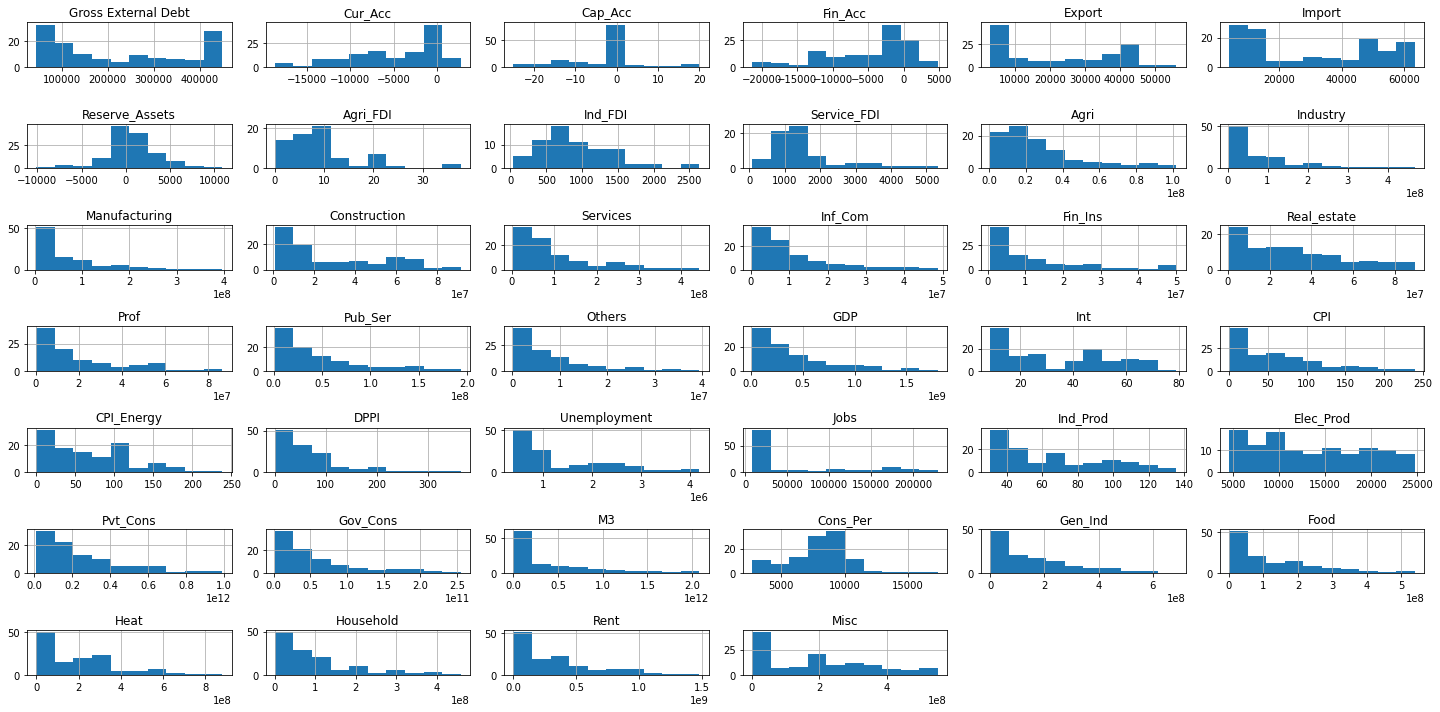

Skewness:


Gross External Debt    0.312596
Cur_Acc               -0.798197
Cap_Acc               -0.342520
Fin_Acc               -0.905330
Export                 0.210658
Import                 0.160790
Reserve_Assets        -0.102646
Agri_FDI               1.751102
Ind_FDI                1.016668
Service_FDI            1.756045
Agri                   1.250427
Industry               1.812201
Manufacturing          1.819922
Construction           0.722393
Services               1.498087
Inf_Com                1.578040
Fin_Ins                1.393839
Real_estate            0.685167
Prof                   1.250796
Pub_Ser                1.370255
Others                 1.564388
GDP                    1.380678
Int                    0.251959
CPI                    1.026987
CPI_Energy             0.710902
DPPI                   1.662282
Unemployment           1.012578
Jobs                   1.162766
Ind_Prod               0.627102
Elec_Prod              0.256569
Pvt_Cons               1.260865
Gov_Cons

In [386]:
df.drop(['Date','TRYUSD'], axis = 1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
df.drop('TRYUSD', axis = 1).skew()

#### Distribution of Dependent Variable

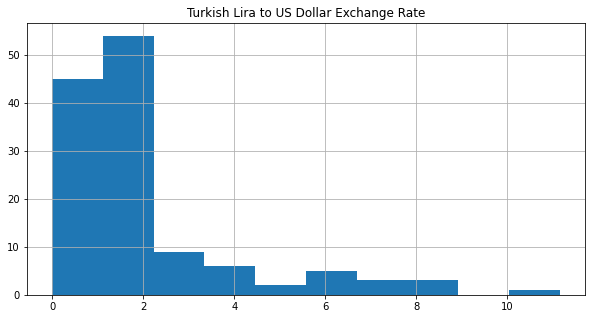

Skewness:


1.927835250967772

In [388]:
df['TRYUSD'].hist()
plt.title("Turkish Lira to US Dollar Exchange Rate")
plt.show()  
print('Skewness:')
df['TRYUSD'].skew()

## Count and Treatment of Missing Values, Redundant columns

In [13]:
df.isnull().sum()/len(df)*100

Date                   0.000000
Gross External Debt    0.781250
Cur_Acc                0.000000
Cap_Acc                0.000000
Fin_Acc                0.000000
Export                 0.000000
Import                 0.000000
Reserve_Assets         0.000000
Agri_FDI              46.875000
Ind_FDI               46.875000
Service_FDI           46.875000
Agri                  25.000000
Industry              25.000000
Manufacturing         25.000000
Construction          25.000000
Services              25.000000
Inf_Com               25.000000
Fin_Ins               25.000000
Real_estate           25.000000
Prof                  25.000000
Pub_Ser               25.000000
Others                25.000000
GDP                   25.000000
Int                    0.000000
TRYUSD                 0.000000
CPI                    0.000000
CPI_Energy            12.500000
DPPI                   0.000000
Unemployment           0.781250
Jobs                   0.781250
Ind_Prod               0.781250
Elec_Pro

In [975]:
Full_set=df.drop("Date", axis=1)

In [976]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [977]:
iter_imp = IterativeImputer()
Full_set = pd.DataFrame(iter_imp.fit_transform(Full_set), columns = Full_set.columns)

In [978]:
#Balance of Payment= Current Account + Capital Account + Financial Account
Full_set['BOP']=Full_set['Cur_Acc']+Full_set['Cap_Acc']+Full_set['Fin_Acc']

#Total Foreign Direct Investment
Full_set['Sect_FDI']=Full_set['Agri_FDI']+Full_set['Ind_FDI']+Full_set['Service_FDI']

## Descriptive Statistics

In [979]:
Full_set.describe()

,Gross External Debt,Cur_Acc,Cap_Acc,Fin_Acc,Export,Import,Reserve_Assets,Agri_FDI,Ind_FDI,Service_FDI,Agri,Industry,Manufacturing,Construction,Services,Inf_Com,Fin_Ins,Real_estate,Prof,Pub_Ser,Others,GDP,Int,TRYUSD,CPI,CPI_Energy,DPPI,Unemployment,Jobs,Ind_Prod,Elec_Prod,Pvt_Cons,Gov_Cons,M3,Cons_Per,Gen_Ind,Food,Heat,Household,Rent,Misc,BOP,Sect_FDI
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,224444.991426,-4701.988281,-2.820312,-4826.080078,22671.990234,30436.146484,527.687500,5.815069,548.181201,1630.122877,25247177.018266,88764192.681960,75012674.947025,28891391.340180,94890315.557952,9838666.004679,12488271.057072,24061458.696106,20192403.063812,45367979.407276,8400356.252465,401387338.049874,34.029297,1.845835,58.164494,58.102548,64.011568,1372406.705433,59798.885217,65.949319,14982.709761,622095360586.715576,47056818355.849098,631843610435.343018,4439.800722,162316117.726042,126419263.412761,197345291.236979,96764290.446614,323302243.773959,188397009.847656,-9530.888672,2184.119147
std,148619.929377,5112.507415,8.168015,6125.260216,16101.570989,20998.391968,2796.035350,7.460674,625.565055,1005.456732,20872062.436352,81378782.342450,68726451.286960,21648022.430851,80960761.294673,9199276.201776,11109505.963285,23775561.746036,17836297.175394,40630032.861743,7468230.394204,346075116.890129,20.517268,2.118445,57.325233,55.378779,69.434845,1006299.895127,68296.207183,29.855544,8119.786499,736610897670.433105,57797070747.782089,830997261273.073242,12385.821708,163934137.817938,132207062.365166,191936965.626230,102761631.094824,331639031.640735,164852411.077854,10836.771070,1350.084942
min,44483.000000,-18777.000000,-25.000000,-21427.250000,2906.250000,3953.750000,-10139.750000,-5.016936,-559.981597,-204.142561,854688.842911,3876536.486383,3466862.022417,774248.441733,3481898.664327,256188.186182,738504.879091,632783.195102,332040.752846,1257346.635469,190370.441147,13449124.934989,8.750000,0.002387,0.040922,0.236067,0.061569,384400.868478,-94658.755222,30.964086,4601.534628,9812015013.000000,1555721747.000000,75537632.711164,-82794.153457,81236.000000,73934.800000,103518.933333,91483.600000,67533.600000,109690.966667,-38851.750000,-754.727129
25%,82338.375000,-8197.750000,-6.500000,-10175.687500,7588.562500,10254.687500,-668.000000,-0.360171,240.875000,974.532997,15644948.301213,34102596.426086,29236808.174736,9652528.030624,42028911.539955,4609695.702795,4124740.321373,4365388.791222,6260129.777785,17760965.240333,2545587.321251,173813093.077453,15.000000,0.214643,4.382757,3.472787,4.664430,595713.440745,15853.299226,40.821598,9089.475917,116838056429.750000,4423990449.195660,13357110618.394600,5591.647039,11708302.983334,8568797.400000,13035414.866667,7408107.100000,23476166.716667,16165348.525000,-18445.000000,1193.908236
50%,173081.000000,-3066.250000,0.000000,-2229.375000,19828.375000,28389.250000,401.500000,5.800480,565.055812,1338.500000,16977395.934113,90159579.496499,75732716.470357,32528586.186443,91051111.359396,7845037.183095,10871649.023669,14798915.333921,21026890.535590,40160853.207183,9080069.465535,360626670.900556,27.500000,1.442477,47.126657,46.365884,50.773220,873624.518951,22613.297628,59.453163,14166.055001,293036657204.500000,23223494636.000000,264681625962.041504,8021.431880,123208887.483330,87875150.400000,171557432.350000,72369362.316666,237400728.116665,182159124.066665,-5327.500000,2194.625000
75%,388064.187500,-592.437500,0.000000,-538.812500,39086.937500,50784.937500,1641.062500,9.250000,880.062500,2594.131176,30795675.340214,92219032.480230,77880443.995341,37090

## Outlier Treatment

The outliers while recognized, have not been removed from the dataset due to the following reasons:

The data was collected from trusted sources - The Central Bank of the Republic of Türkiye, International Monetary Fund and OECD. The chances of measurement error is minimal

All the variables and related data is specific to Turkey

It is crucial for the outliers to be considered since the crux of the project is about an unprecedented event

In [905]:
tar_col = ['TRYUSD']
con_col = list(set(Full_set.columns)-(set(tar_col)))

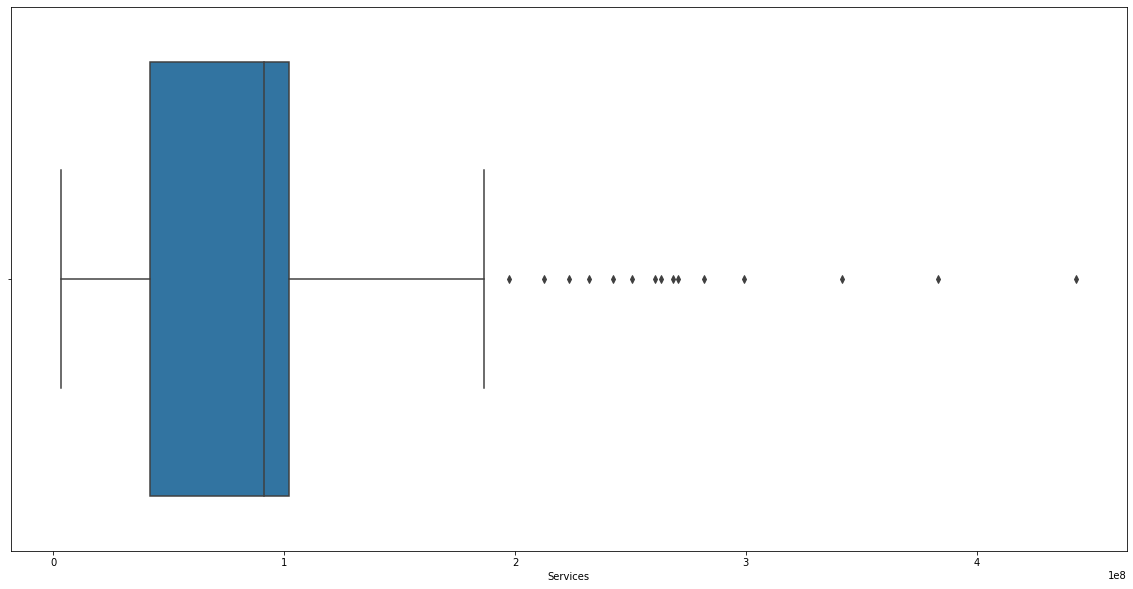

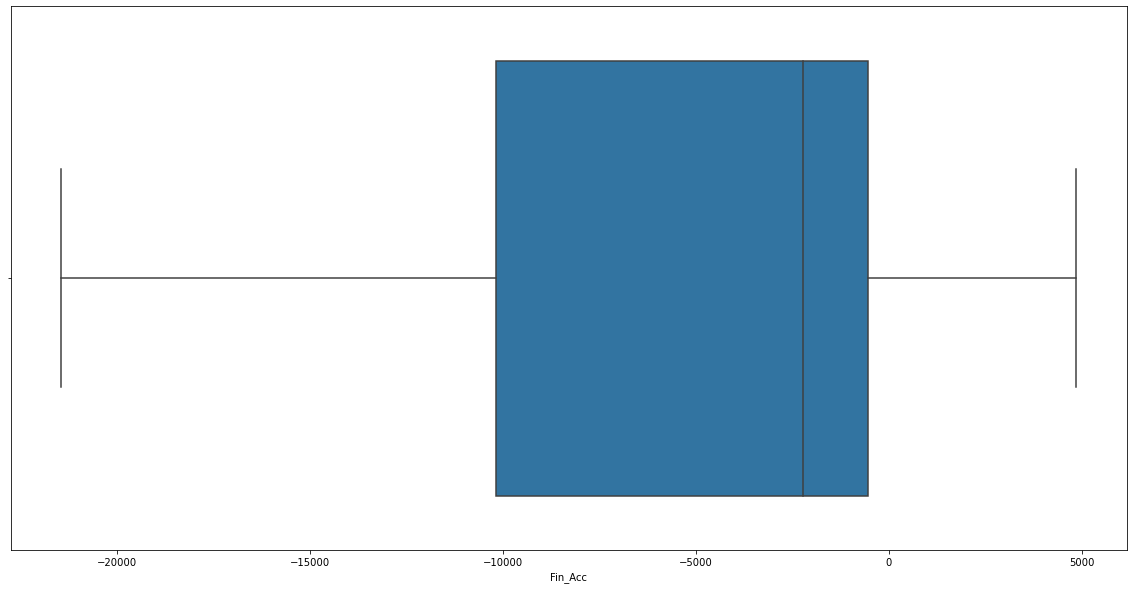

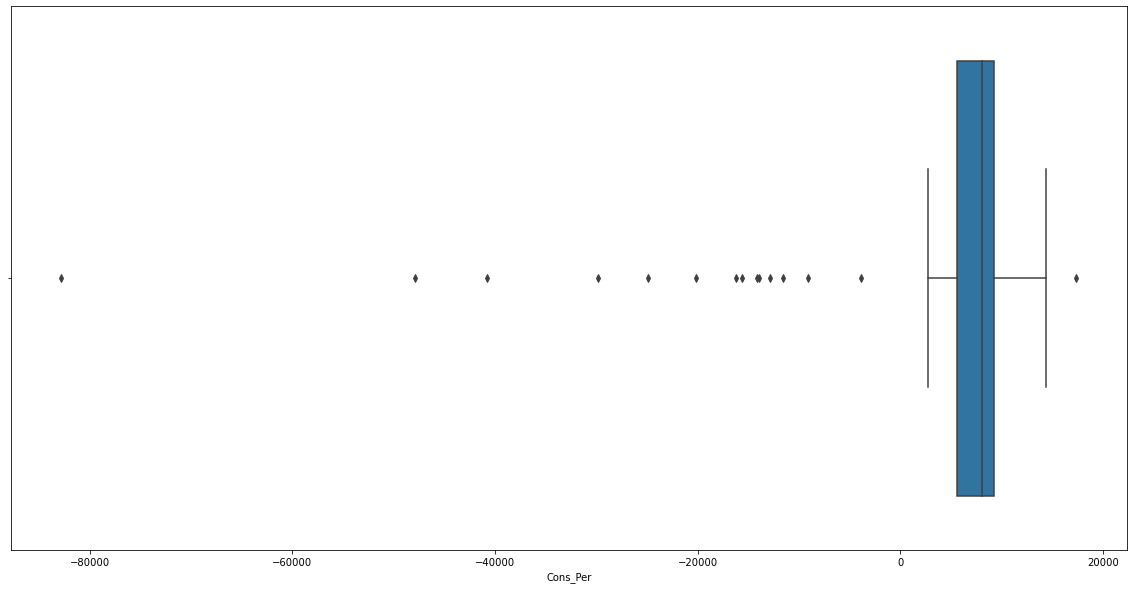

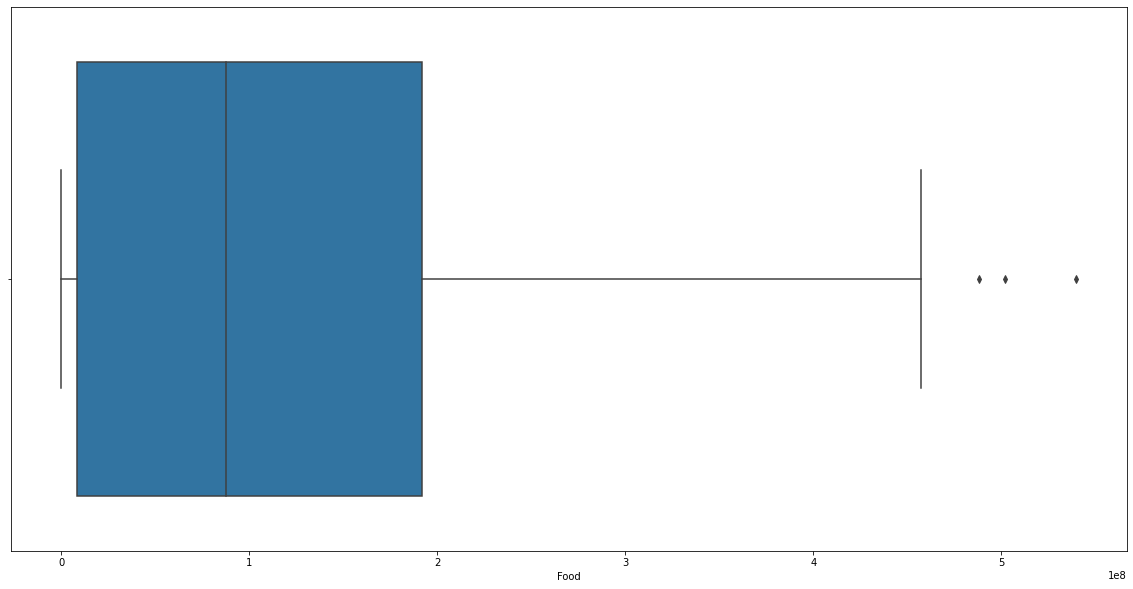

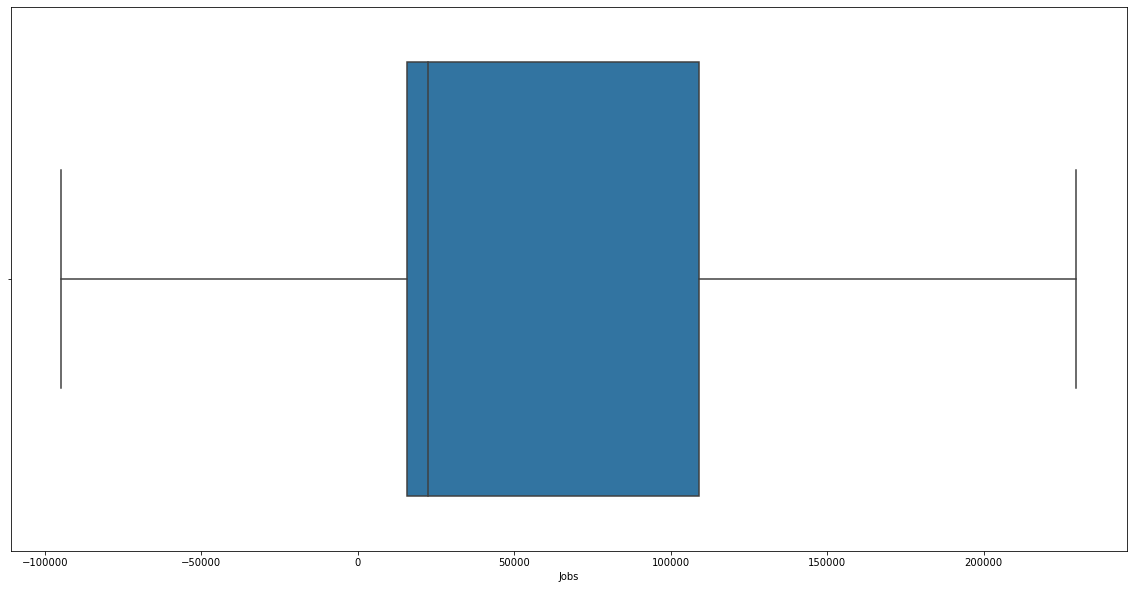

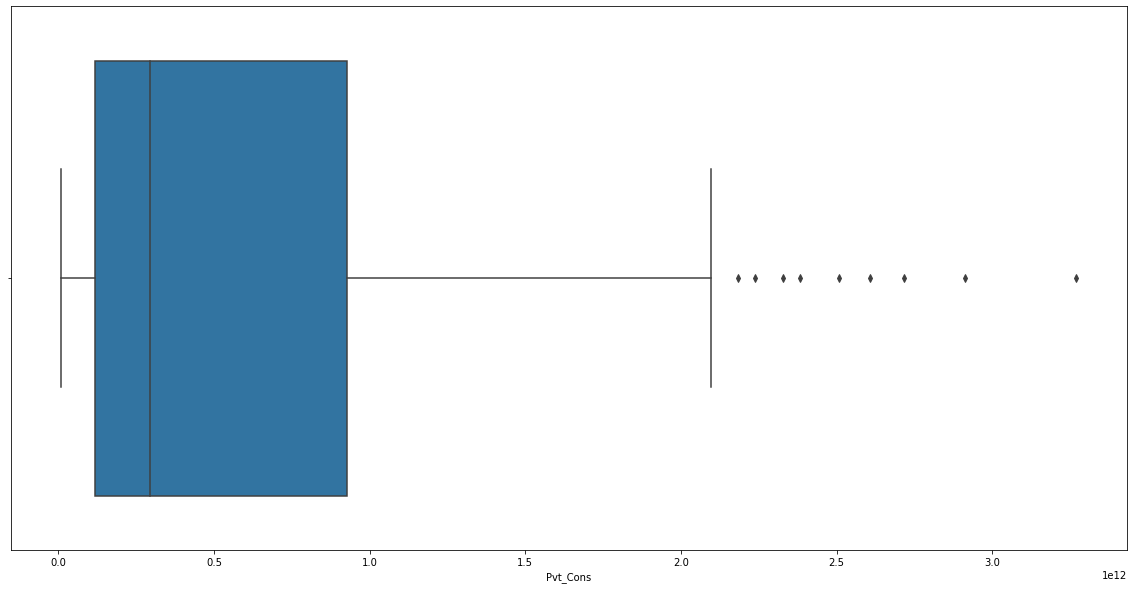

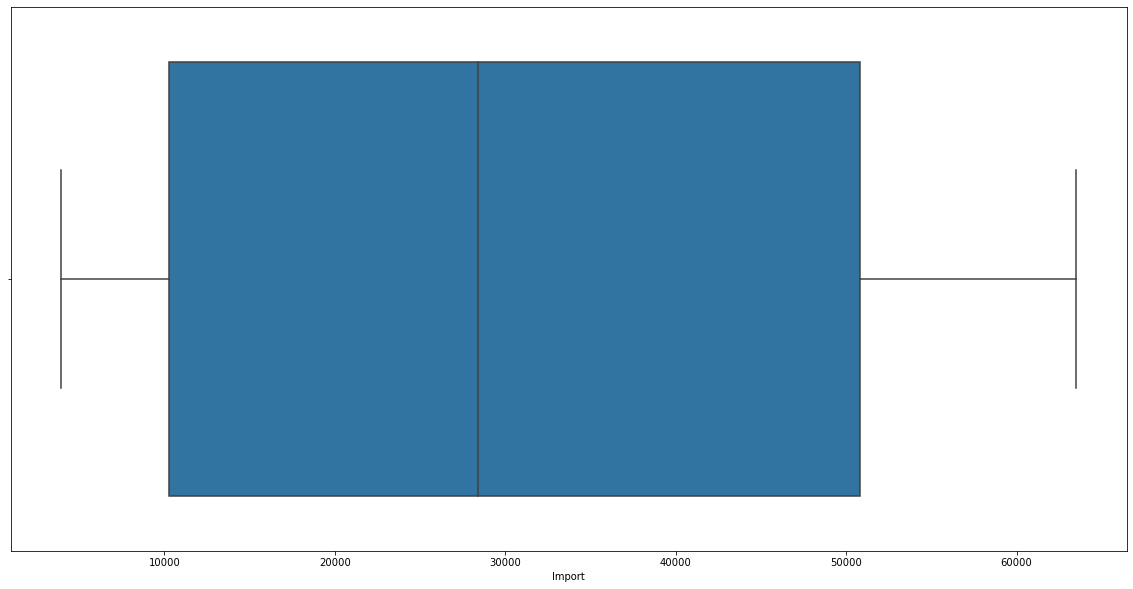

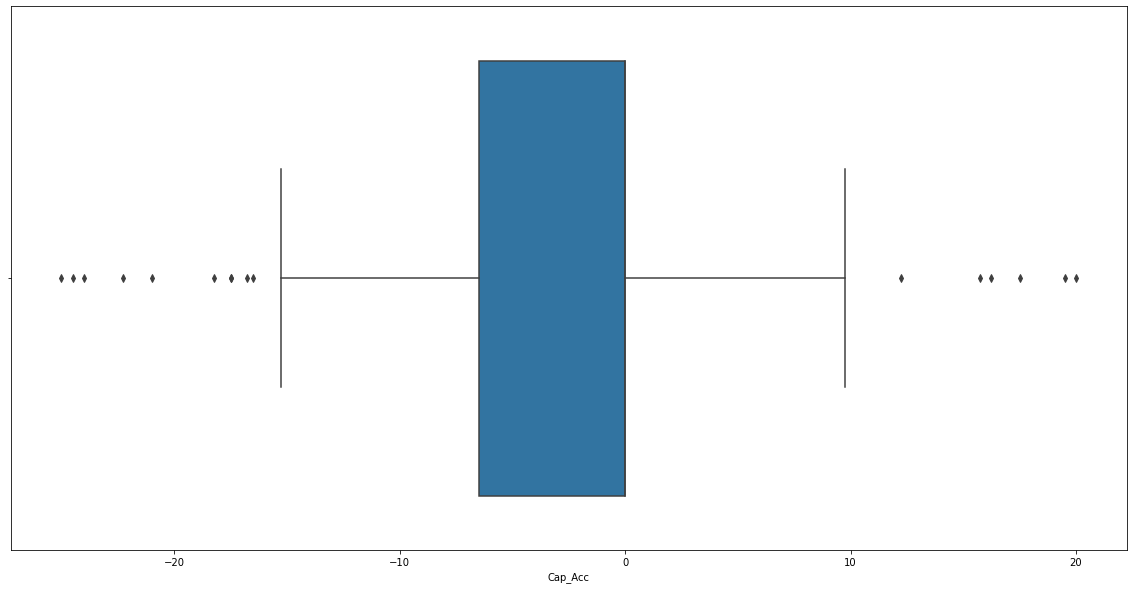

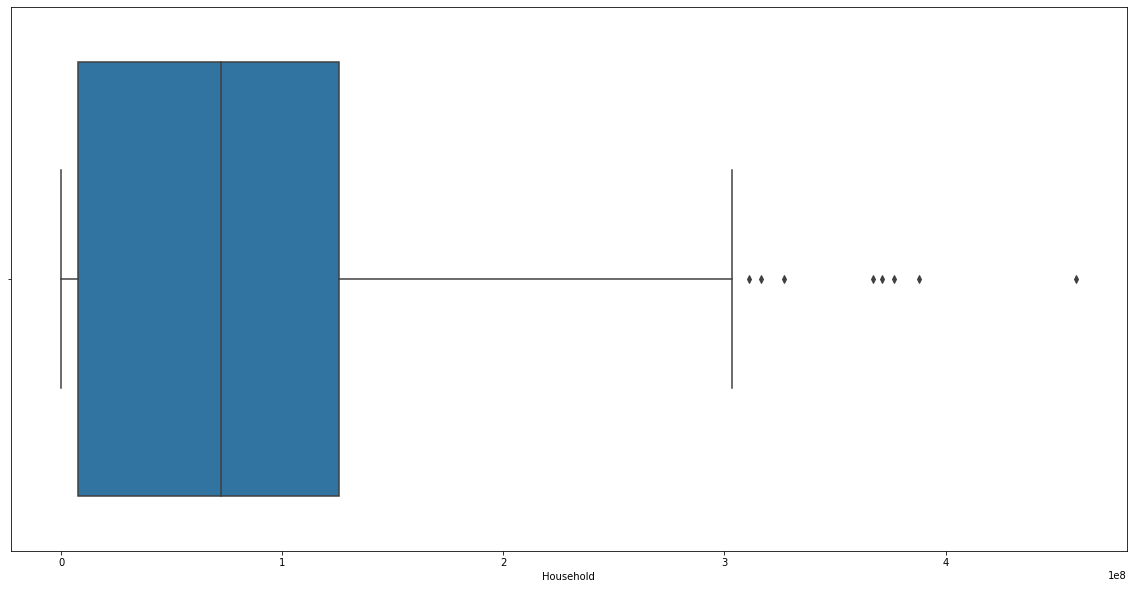

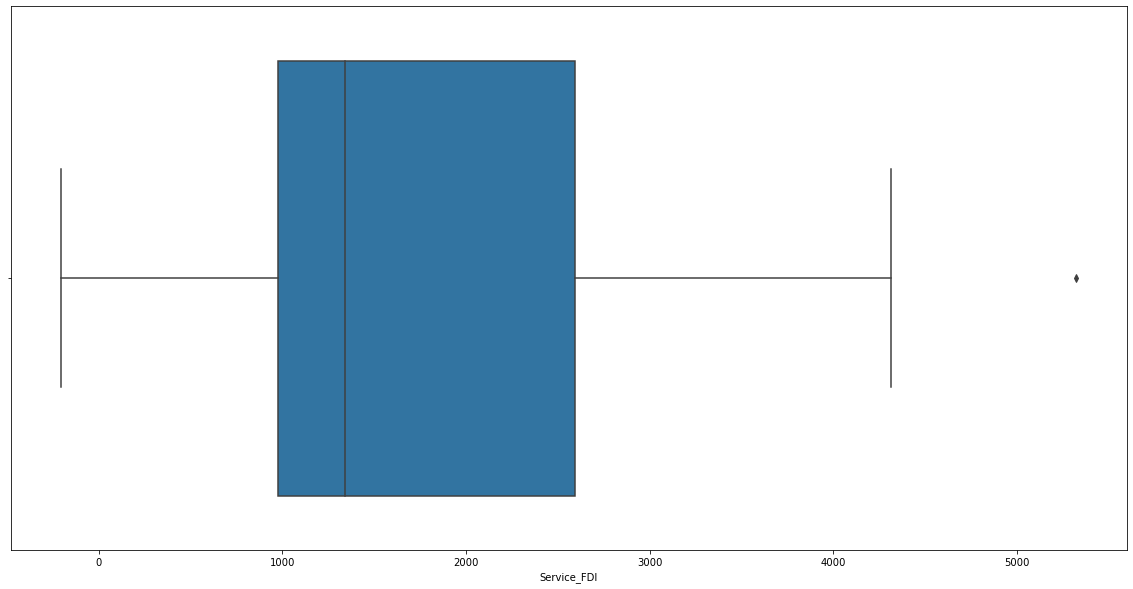

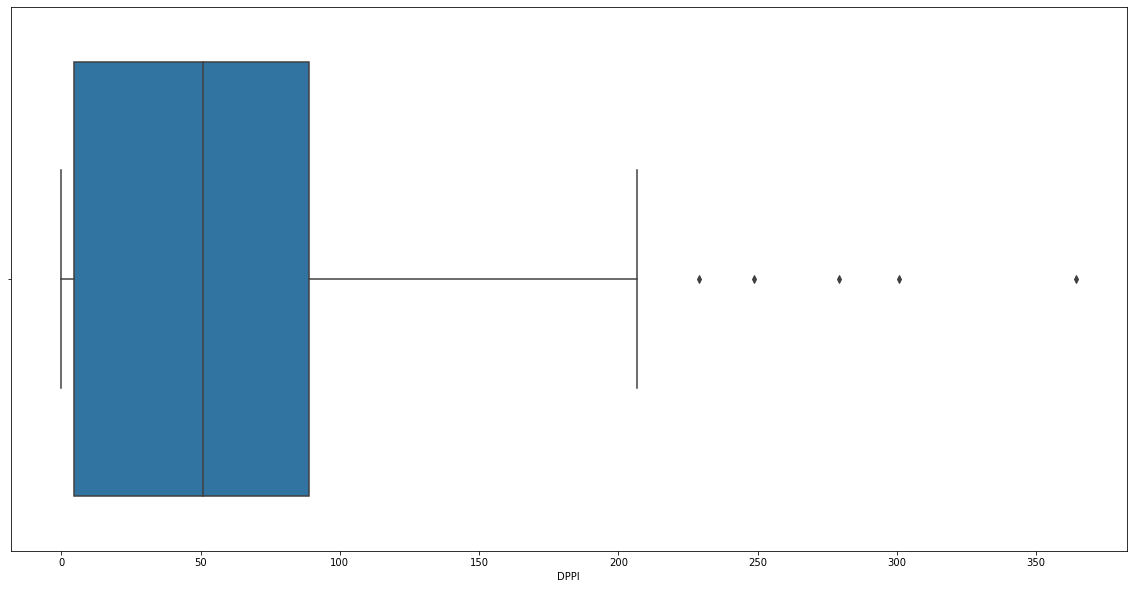

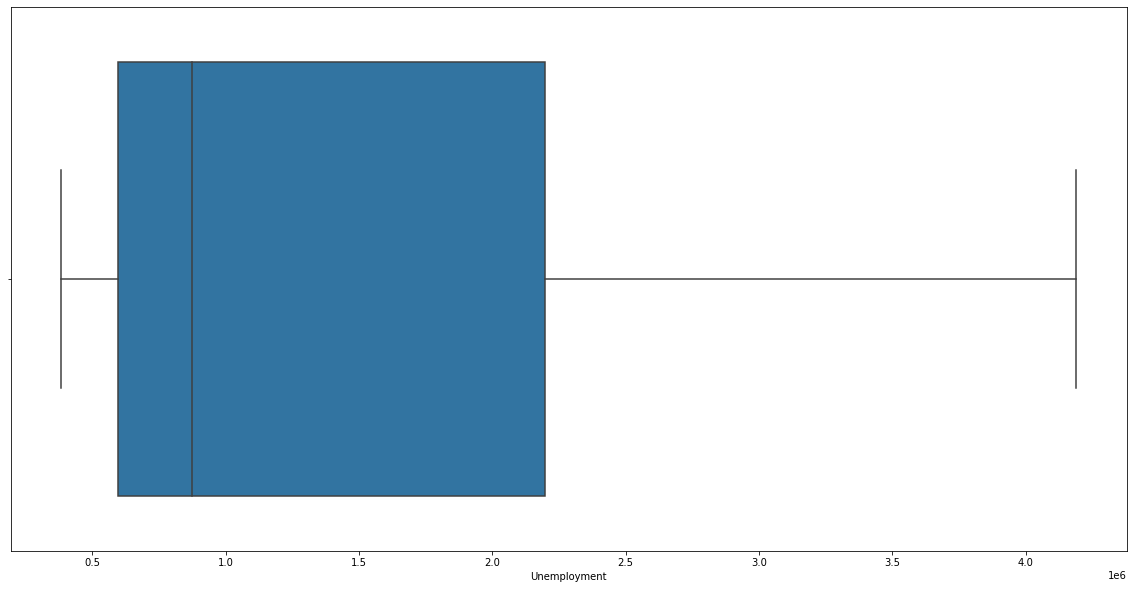

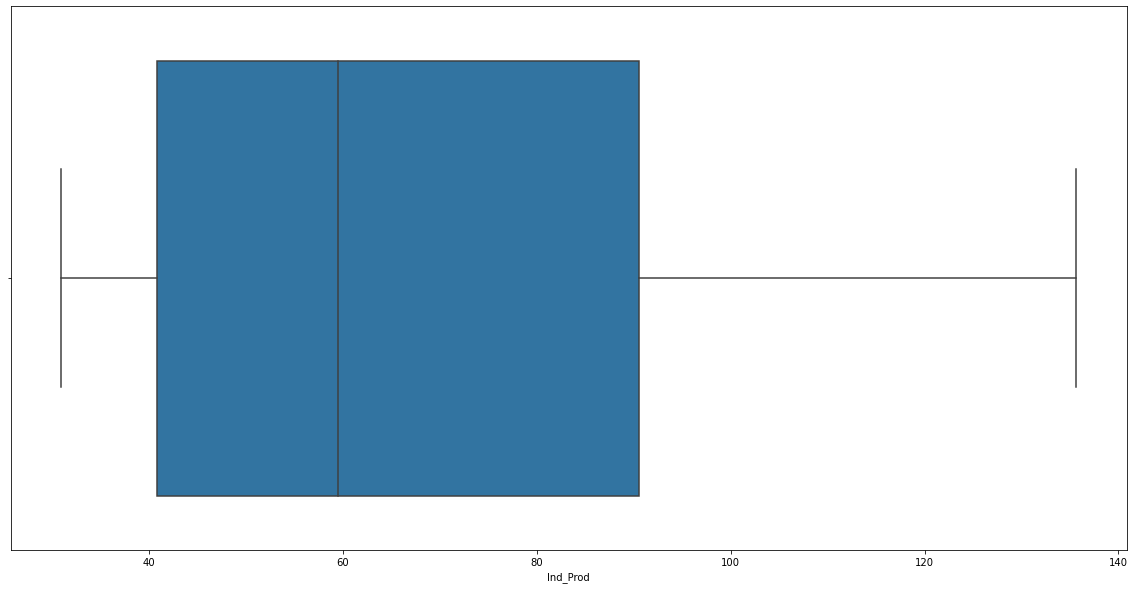

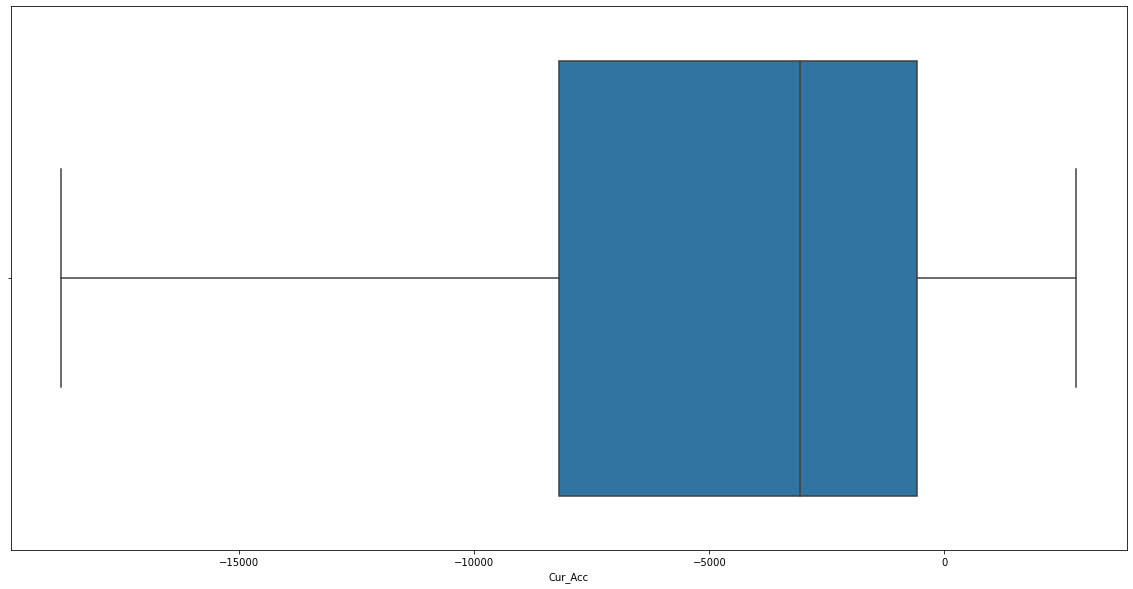

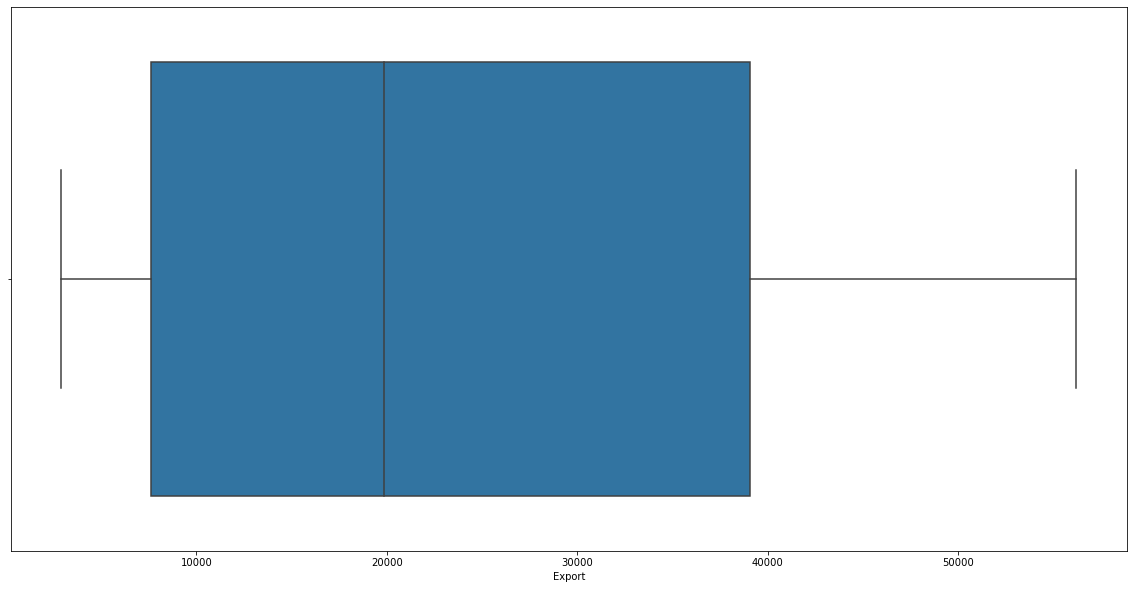

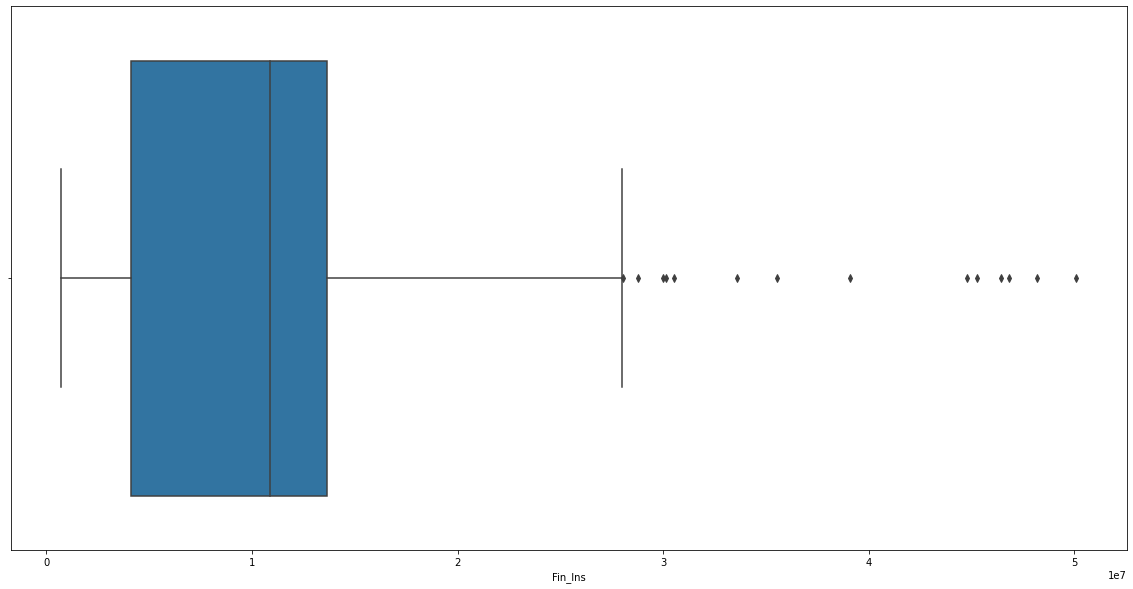

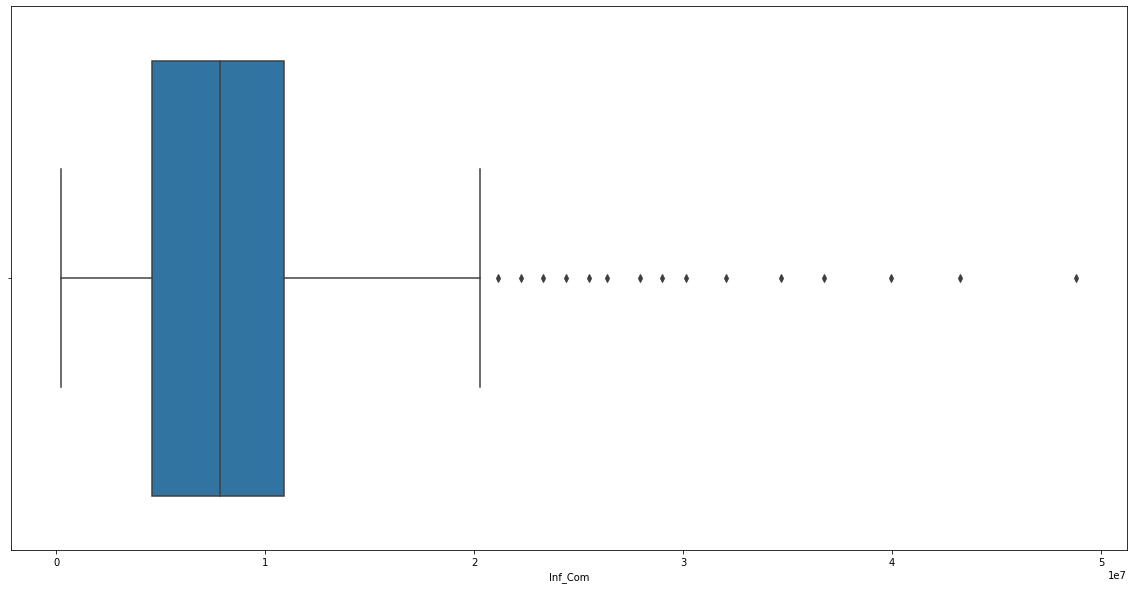

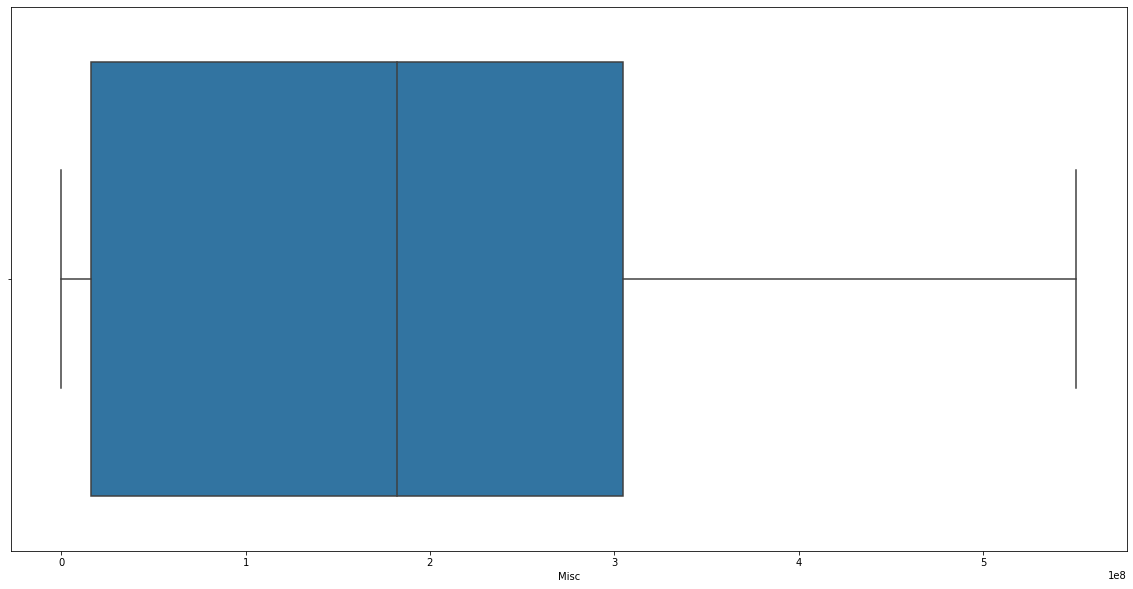

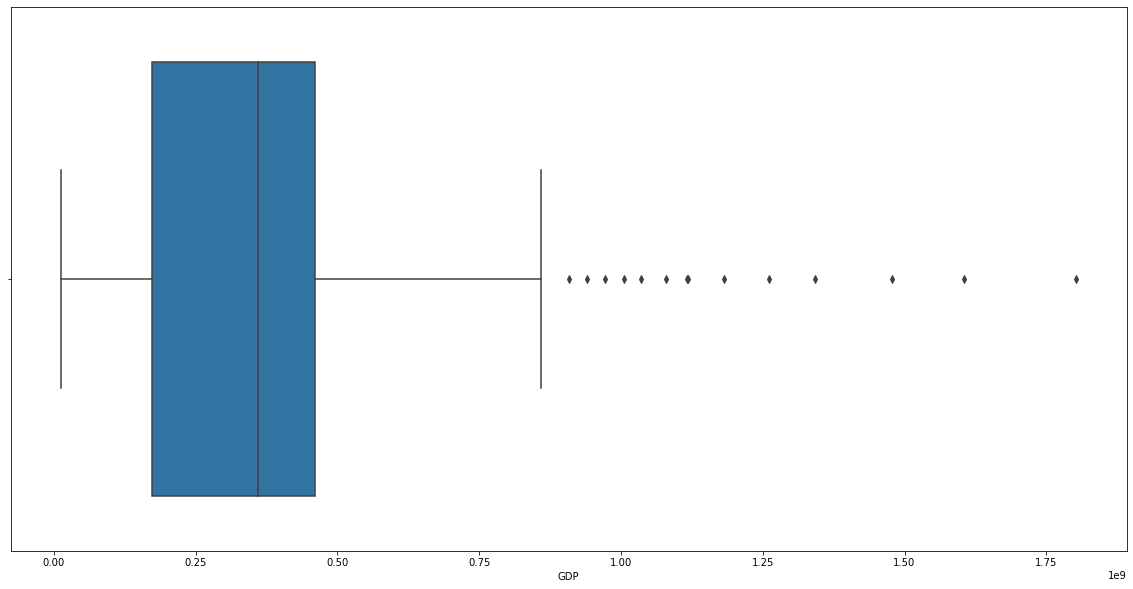

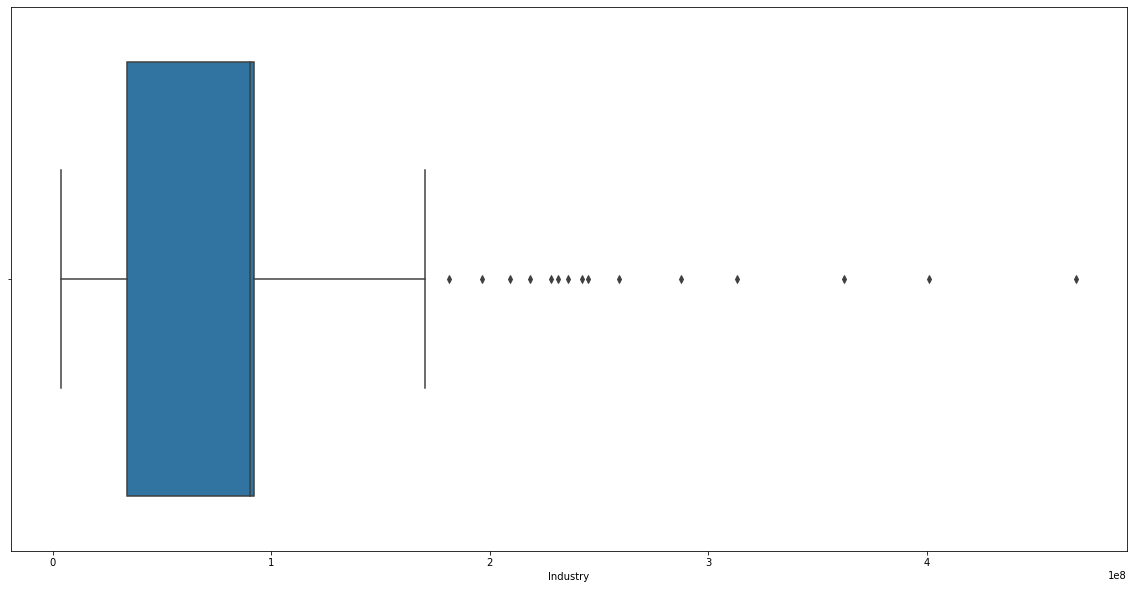

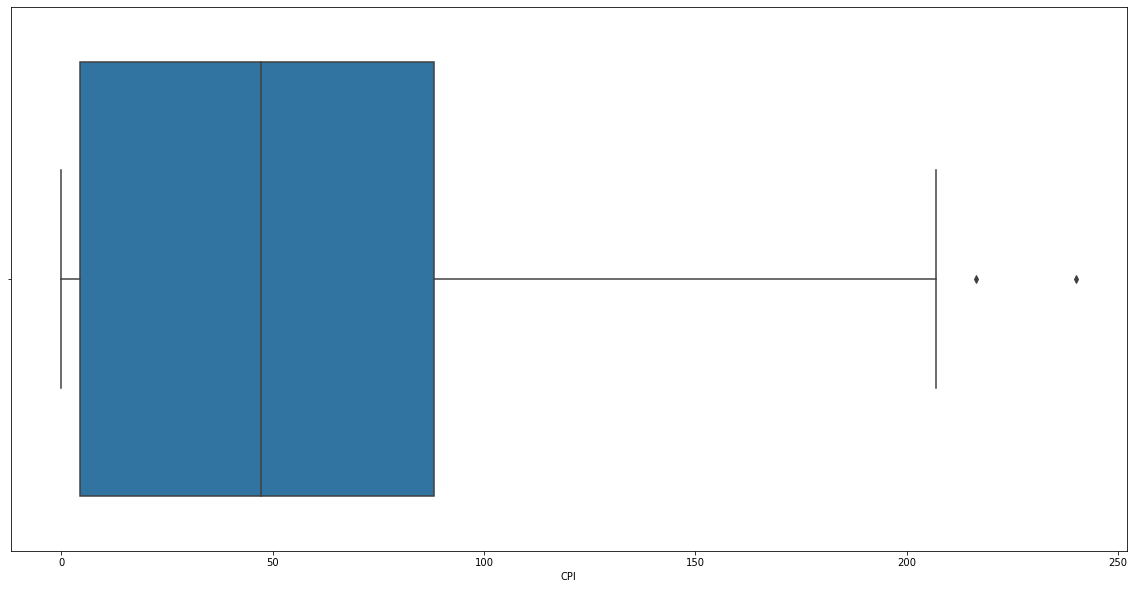

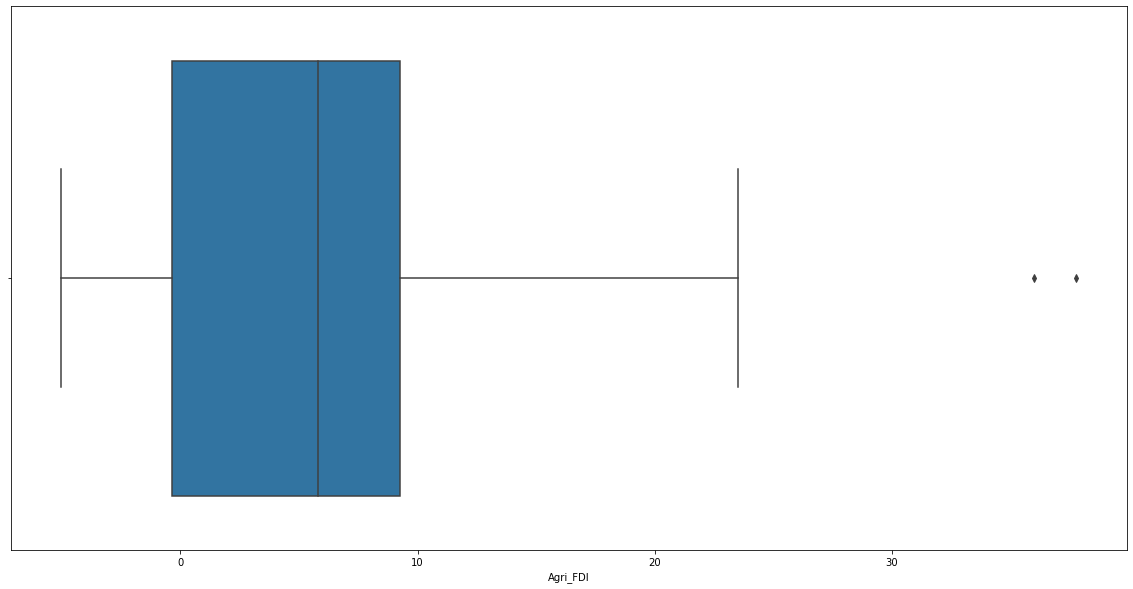

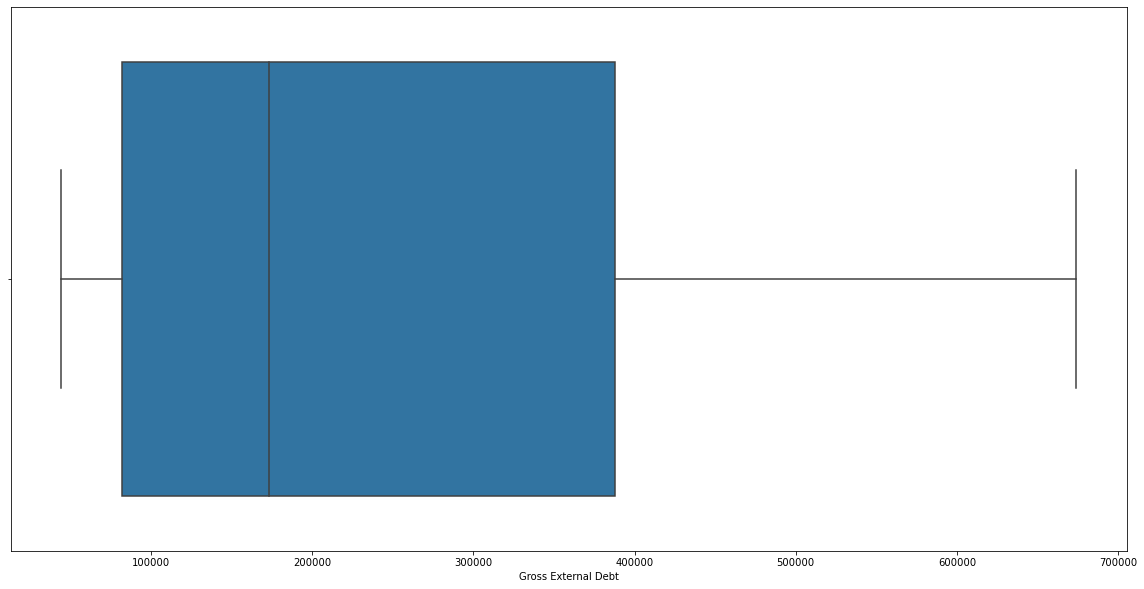

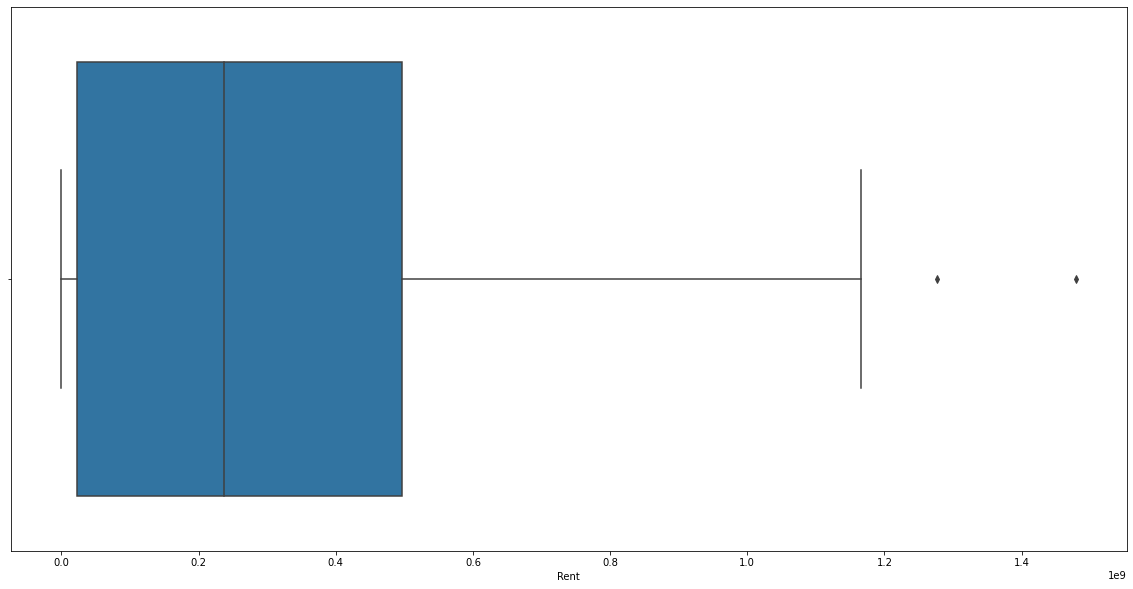

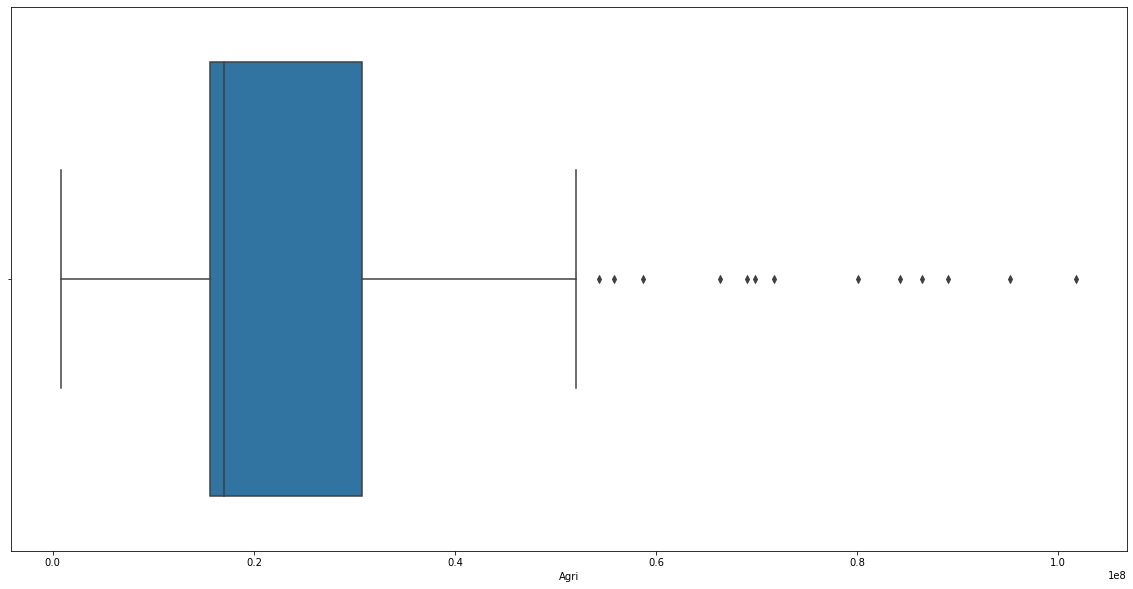

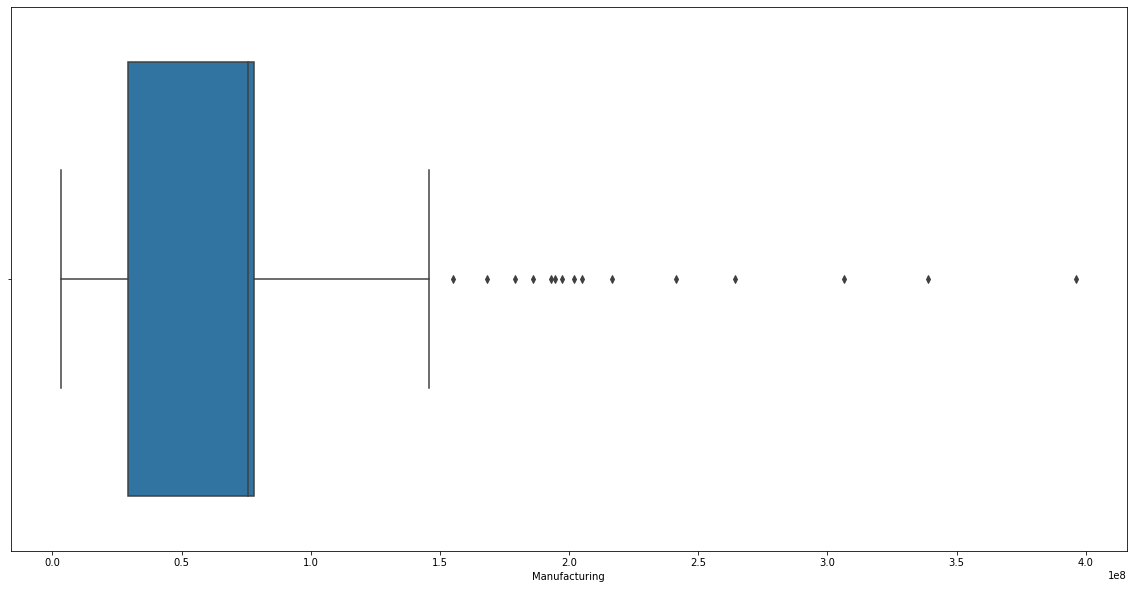

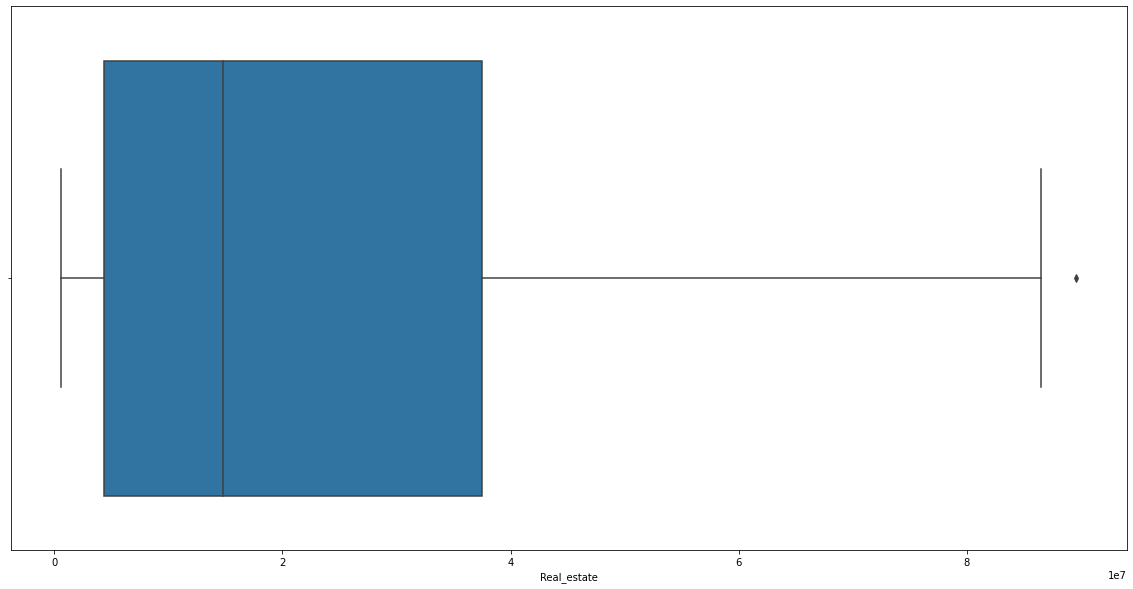

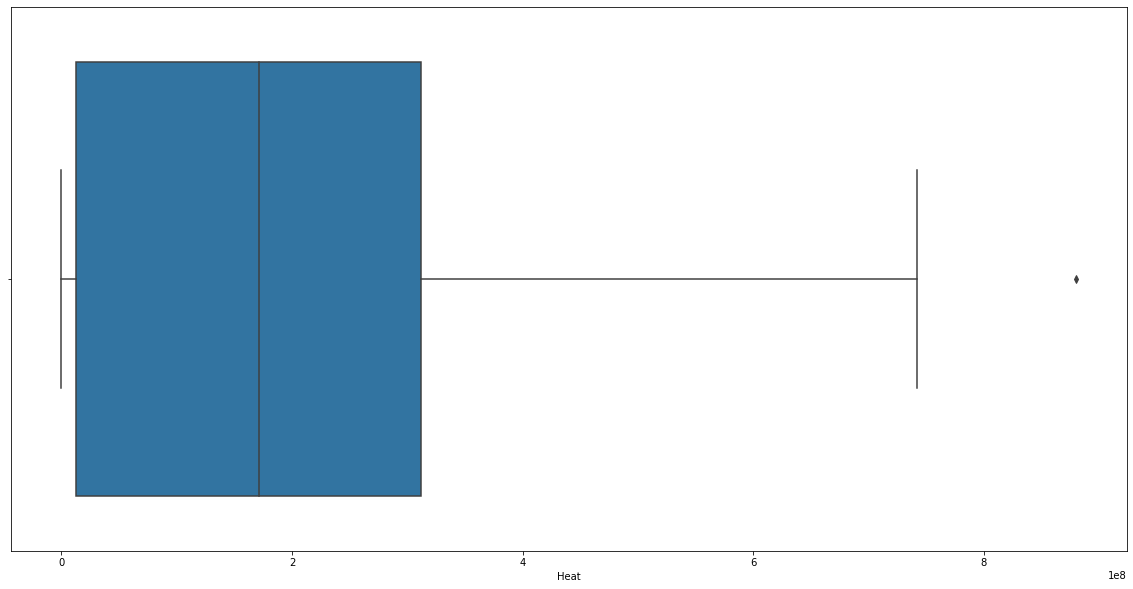

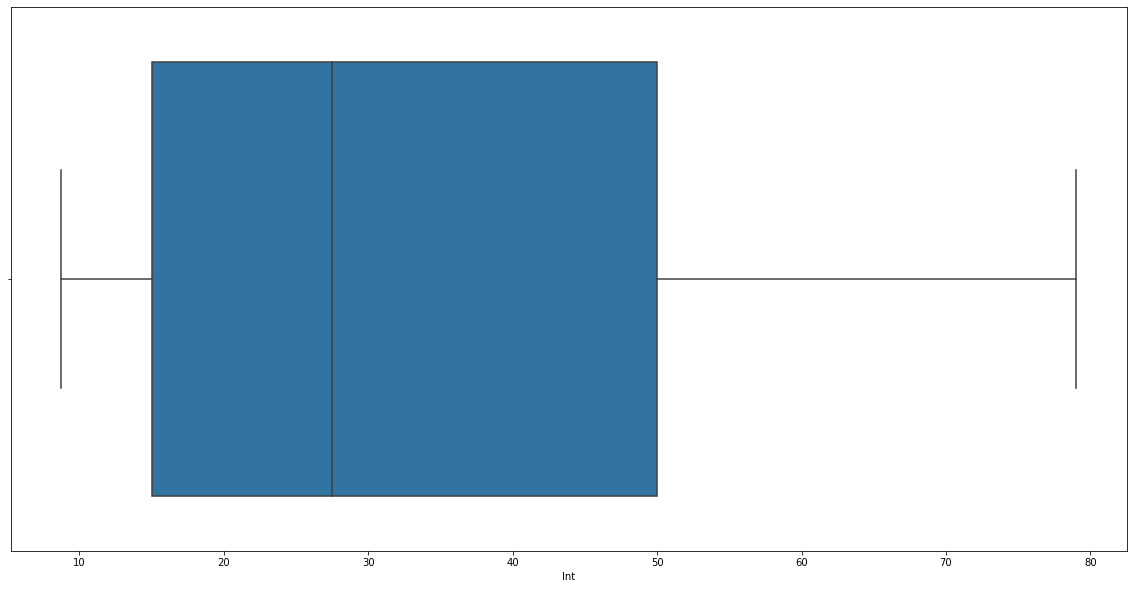

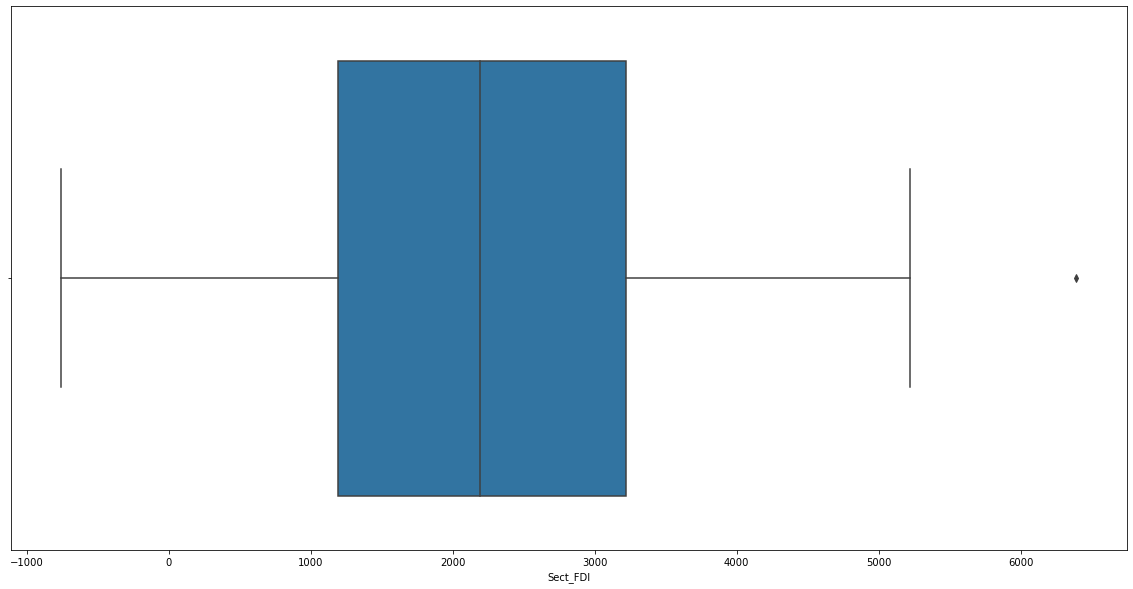

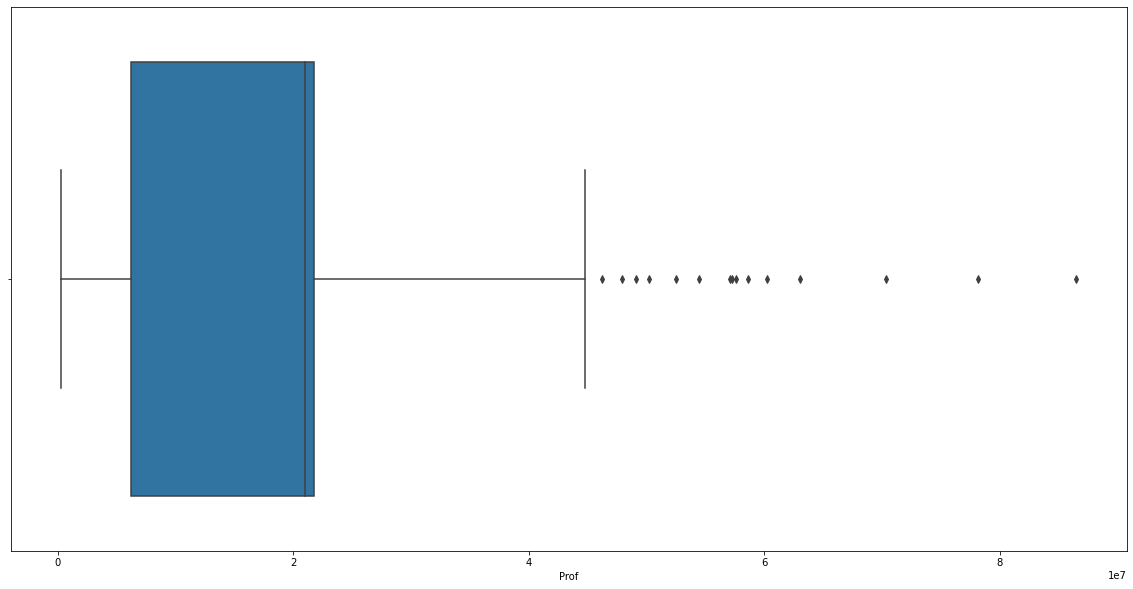

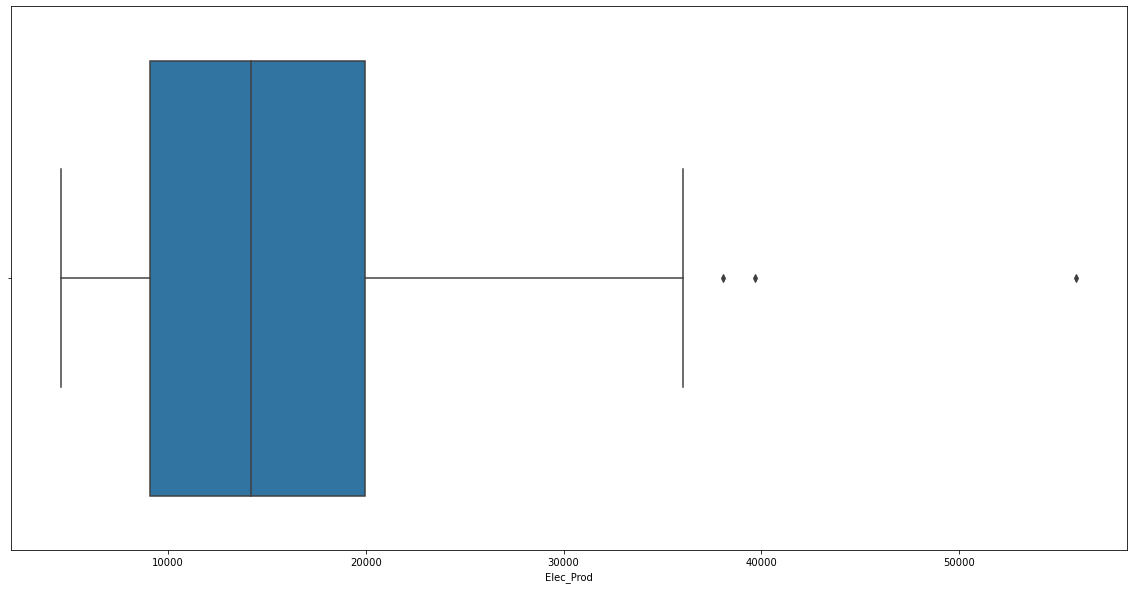

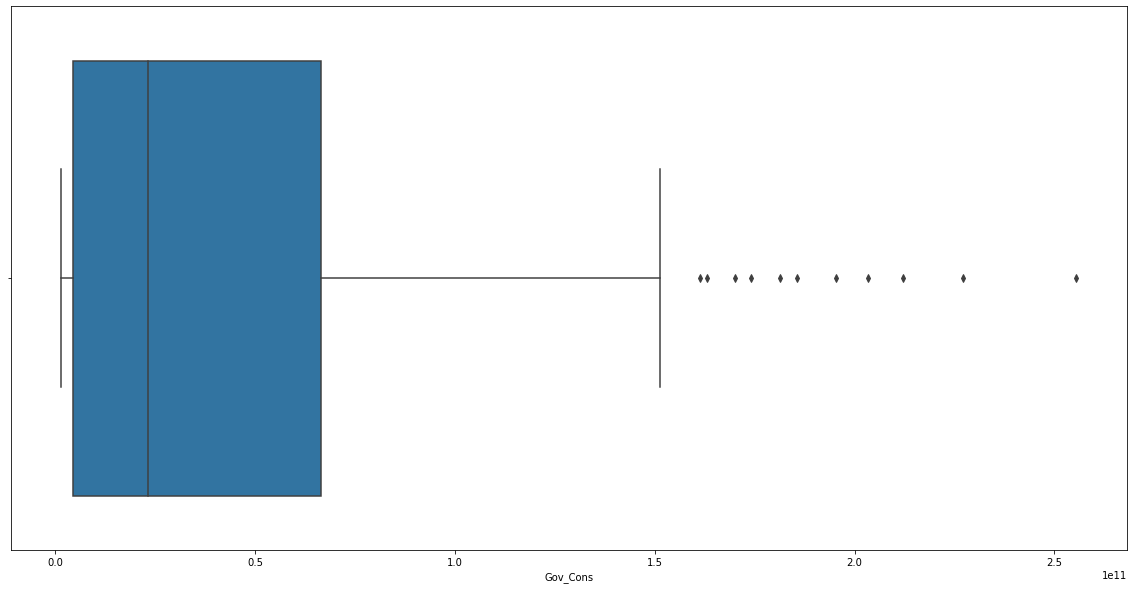

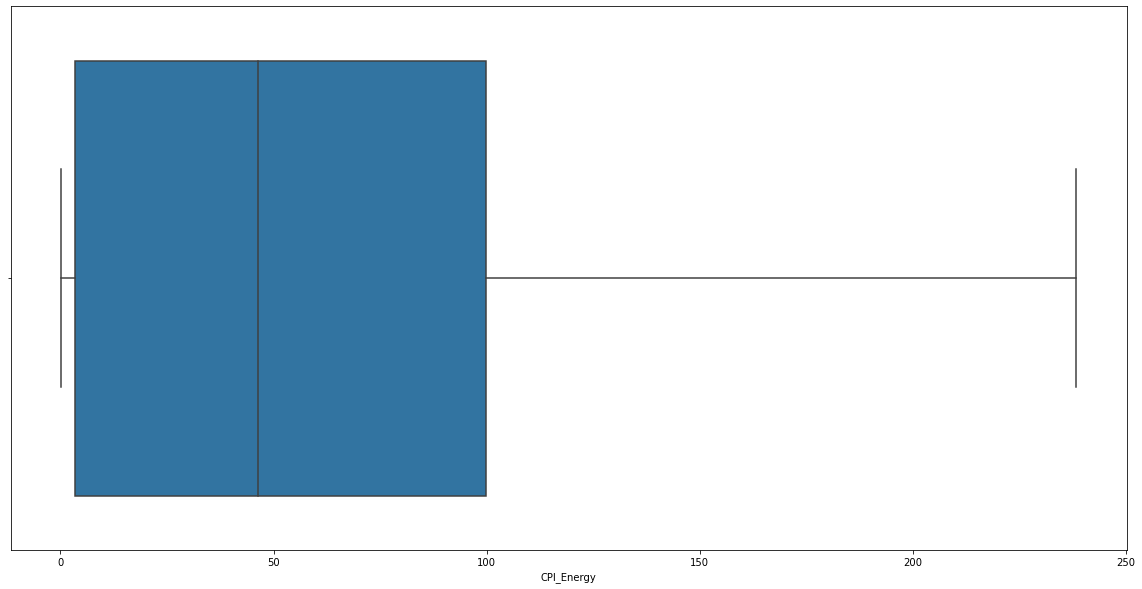

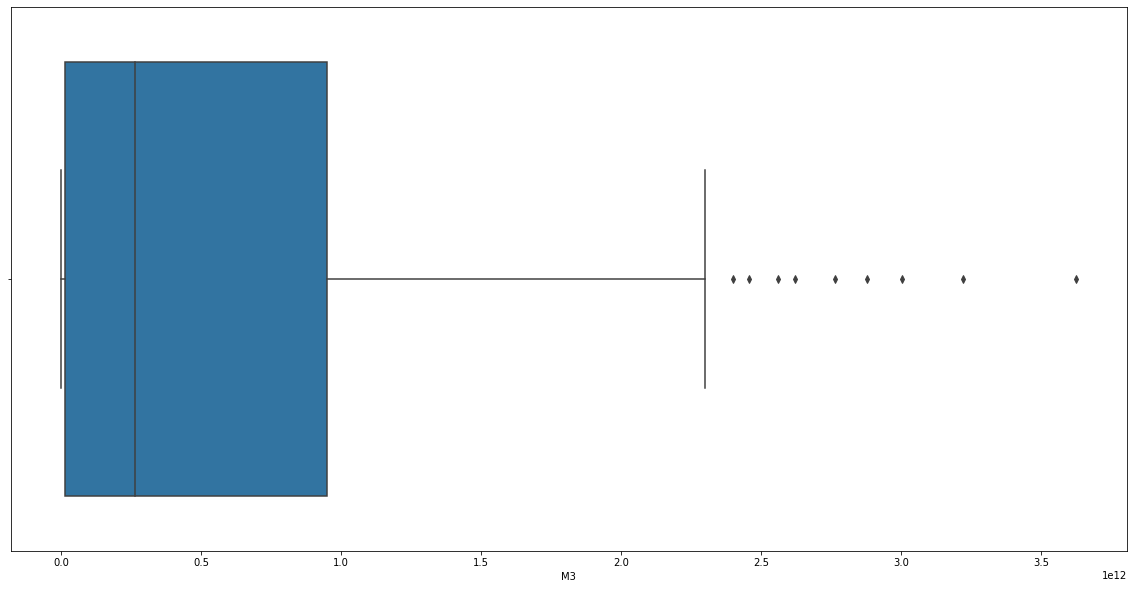

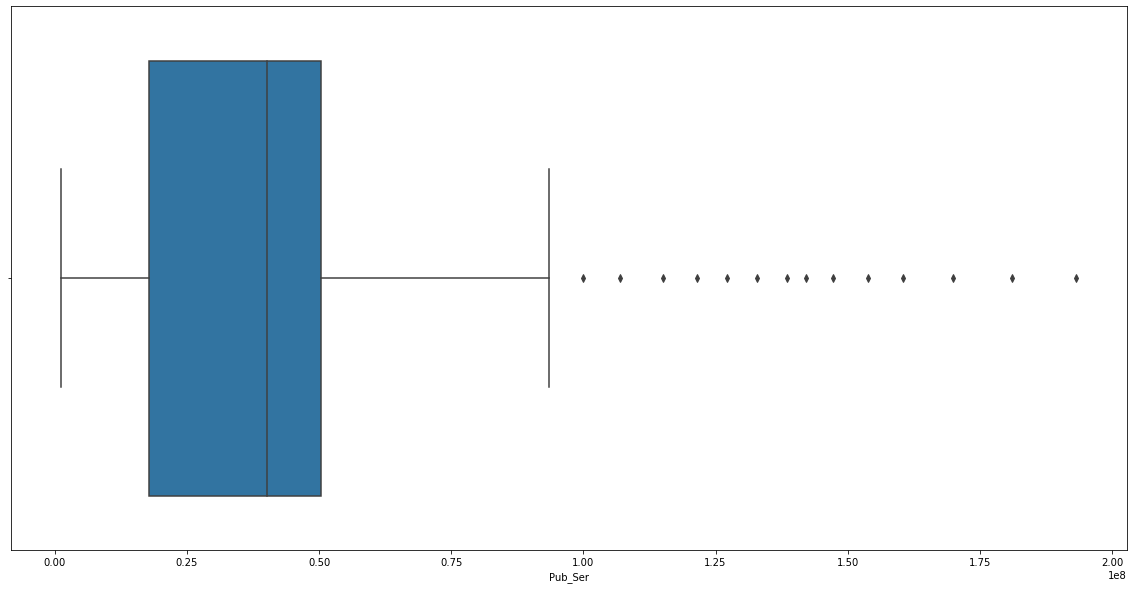

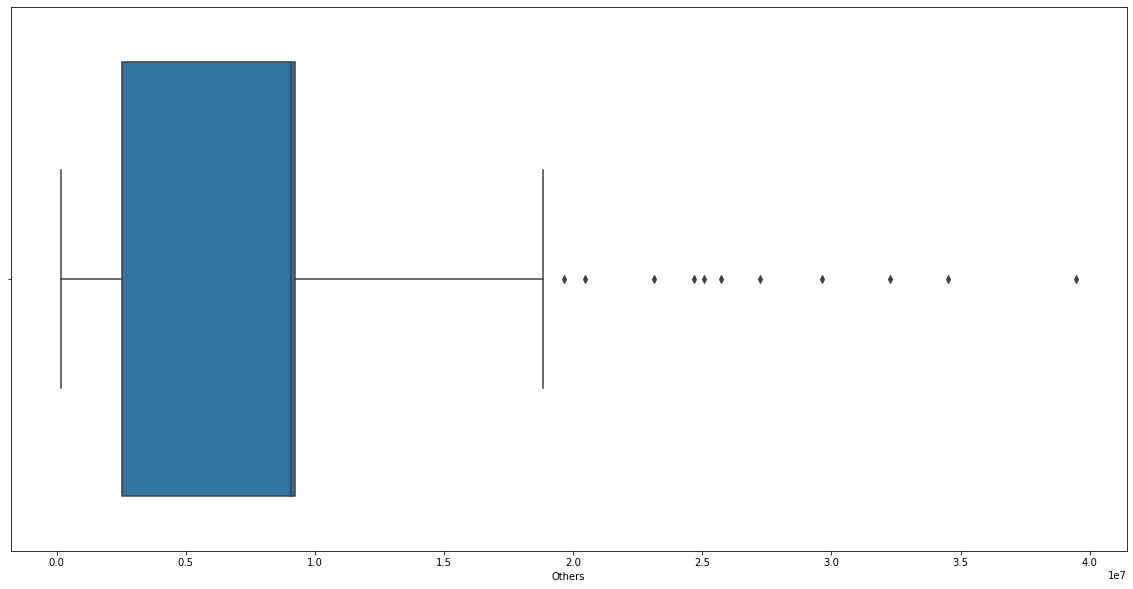

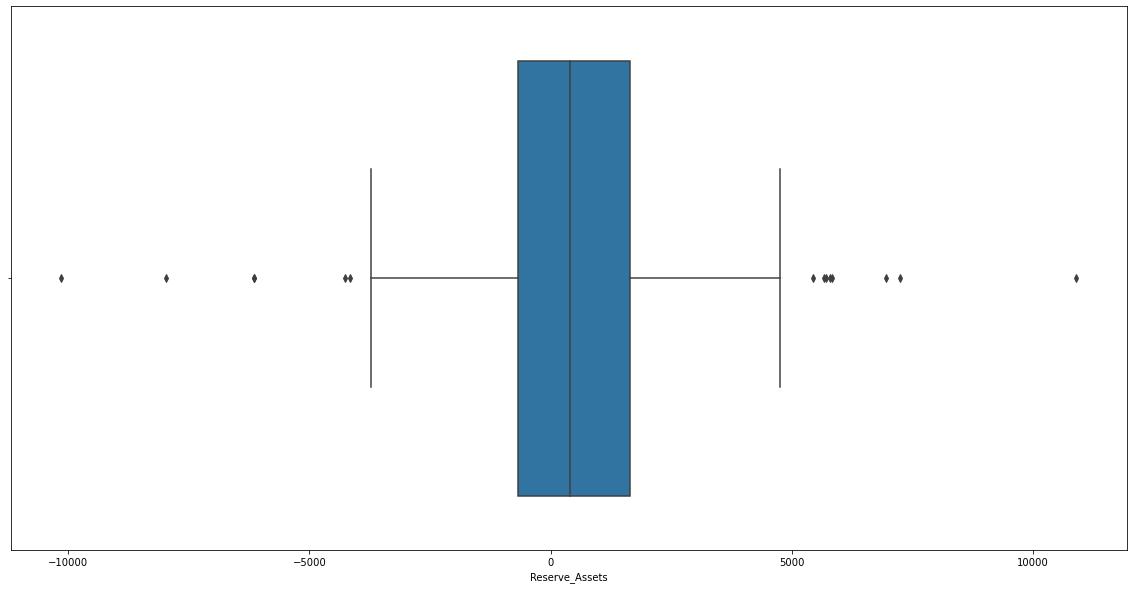

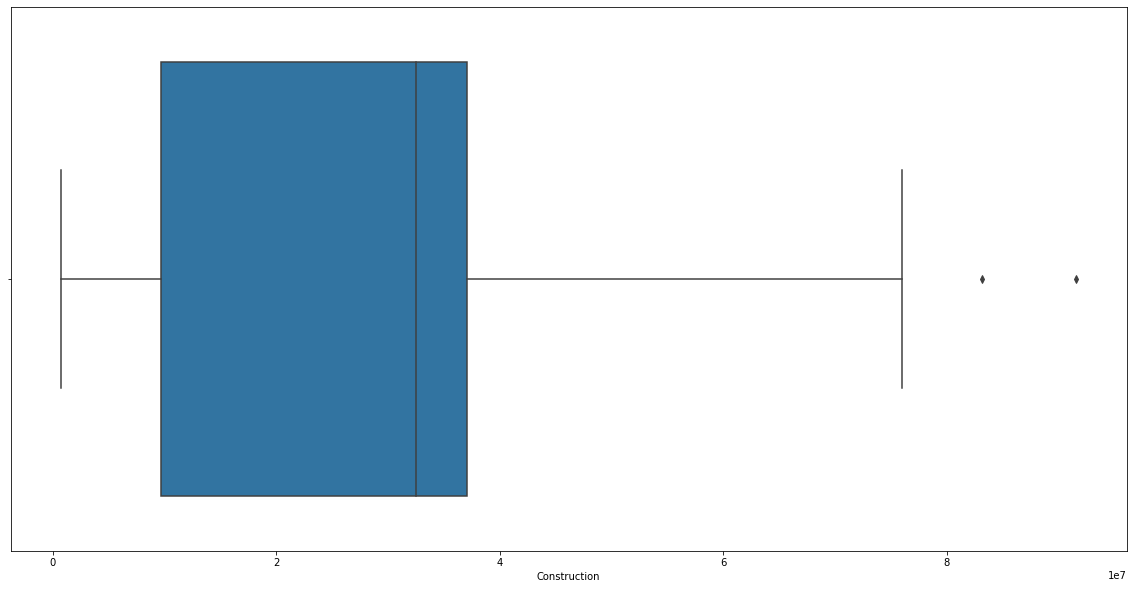

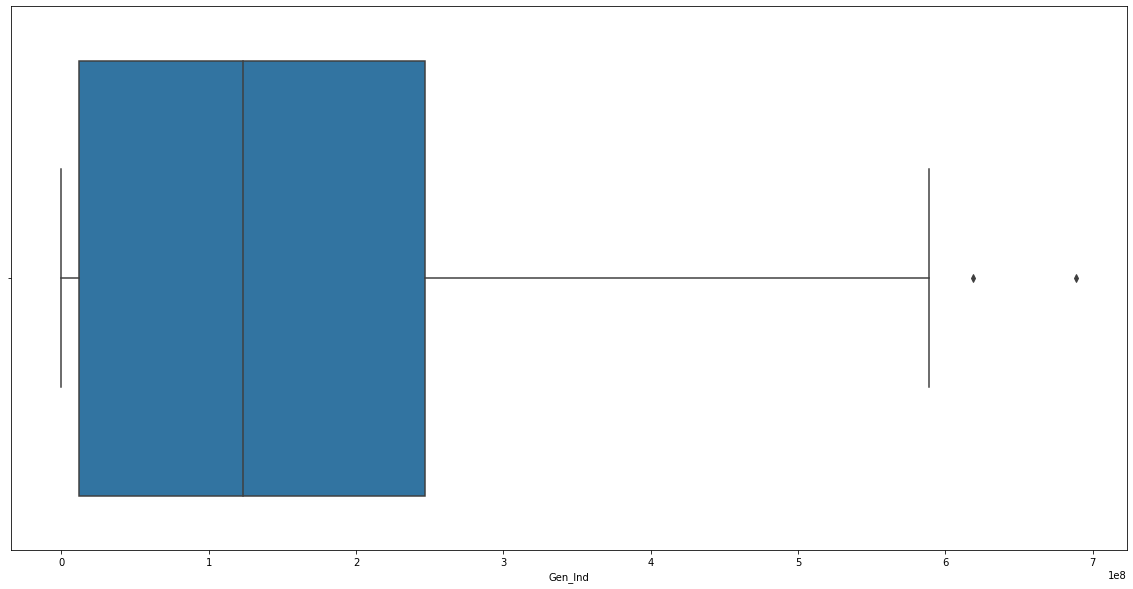

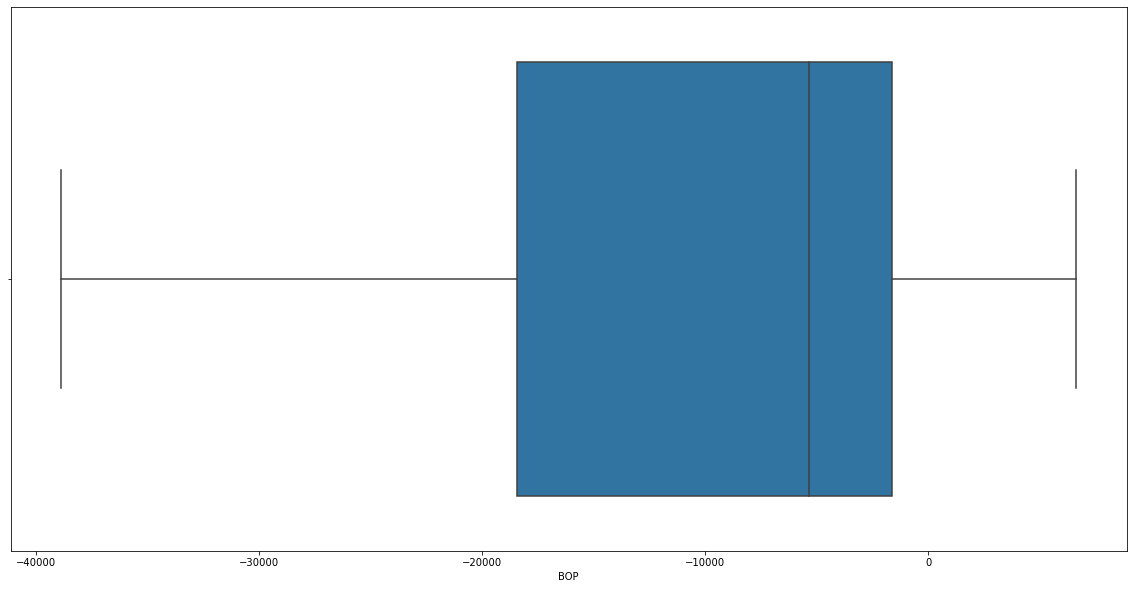

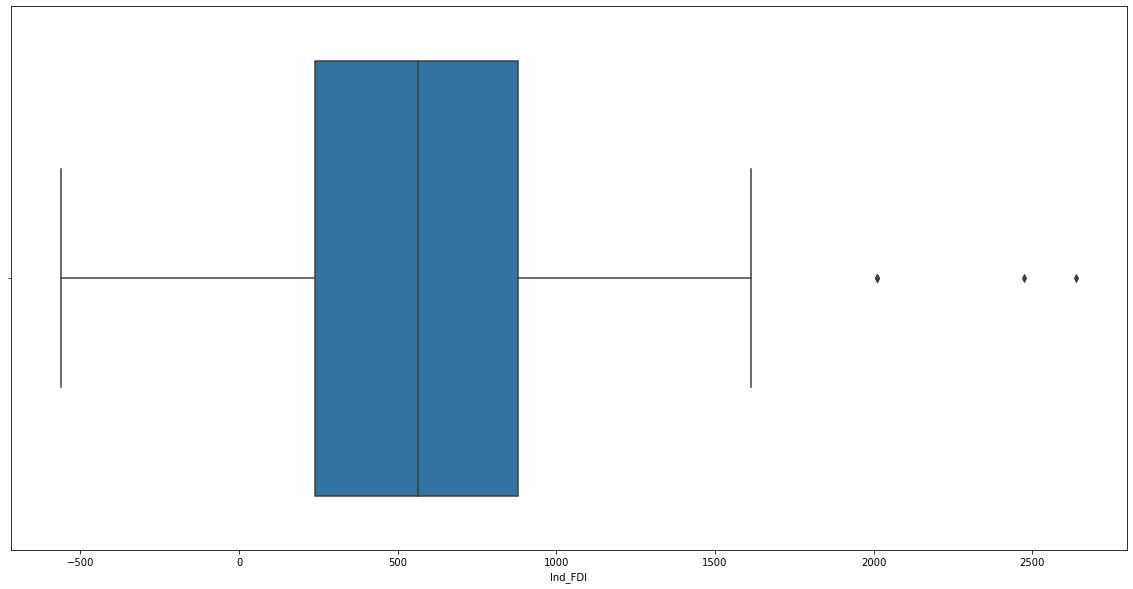

In [906]:
for col in con_col:
    sns.boxplot(x=col,data=Full_set)
    plt.show()

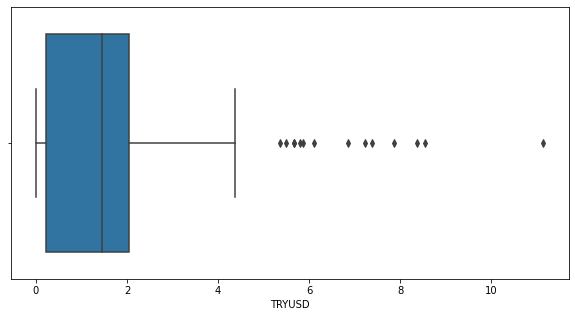

In [95]:
sns.boxplot(x=tar_col[0],data=Full_set);

## Scaling - Standardization

In [1078]:
X=Full_set.drop('TRYUSD', axis=1)
X+=94658.755222
X=X.apply(stats.zscore)
y=Full_set['TRYUSD']

## Relationship Between Variables

#### Exports and Imports over time

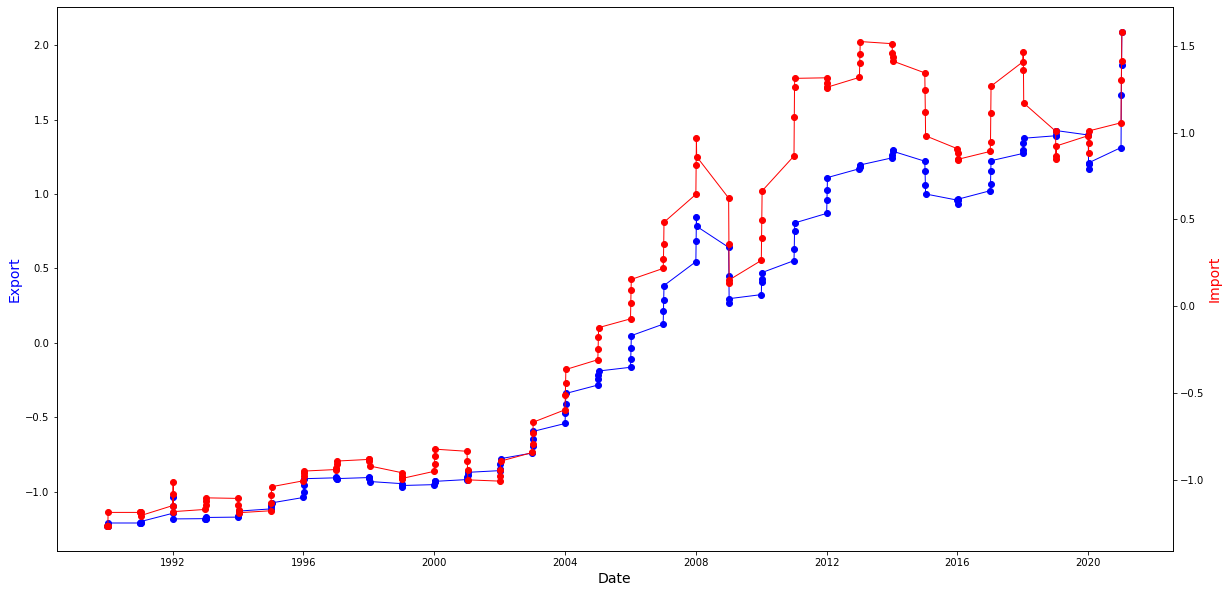

In [981]:
fig,ax = plt.subplots()
ax.plot(df.Date, X.Export, color="blue", marker="o", linewidth=1)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Export",color="blue",fontsize=14)
ax2=ax.twinx()
ax2.plot(df.Date, X["Import"],color="red", marker='o', linewidth=1)
ax2.set_ylabel("Import",color="red",fontsize=14)
plt.show()

The above plot shows the value of exports and imports over time. It is typical of developing nations to import more than they export, and Turkey is no different. Between 2011 and 2016 there seems to be an abnormally high quantity of imports, but that trend has changed in the crisis period.

#### Relation of TRYUSD and CPI with time

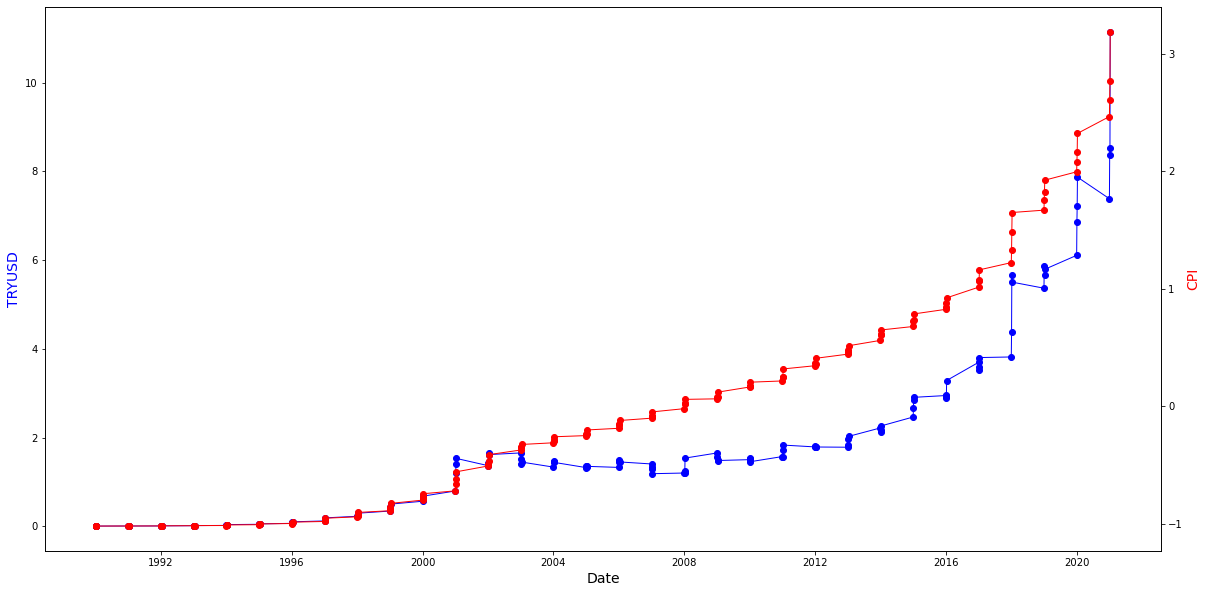

In [983]:
fig,ax = plt.subplots()
ax.plot(df.Date, y, color="blue", marker="o", linewidth=1)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("TRYUSD",color="blue",fontsize=14)
ax3=ax.twinx()
ax3.plot(df.Date, X["CPI"],color="red", marker='o',linewidth=1)
ax3.set_ylabel("CPI",color="red",fontsize=14)
plt.show()

-This graph shows a positive relation between TRYUSD AND CPI-Consumer price index. As the Exchange rate is increasing drastically after 2018, CPI also increased which implies price of consumer goods and services is increasing and it is directly affecting every household in Turkey, especially the middle class.

-This is also due to the fact that Turkey relies a lot on import of goods and an increase in Exchange rate makes consumption barely affordable

#### Relationship between TRYUSD and DPPI with time

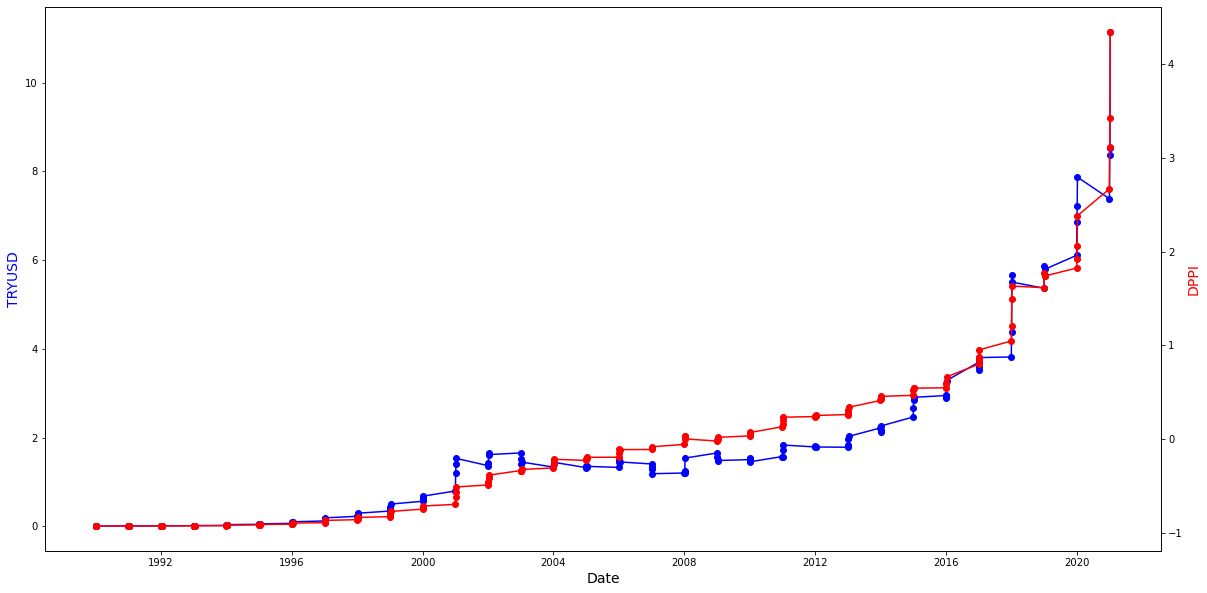

In [984]:
fig,ax = plt.subplots()
ax.plot(df.Date, y, color="blue", marker="o")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("TRYUSD",color="blue",fontsize=14)
ax5=ax.twinx()
ax5.plot(df.Date, X["DPPI"],color="red", marker="o")
ax5.set_ylabel("DPPI",color="red",fontsize=14)
plt.show()

This graph shows a relation between Exchange rate and DPPI-Domestic Producer price Index.

As we can see, both increase drastically after 2018. Rising DPPI is an indication of the increase in prices of raw materials which in turn results in the increase of final production costs.

Since DPPI is a measure of inflation based on input costs to producers, we can conclude that this is also a sign of inflation.

#### Relationship between TRYUSD and Total FDI over time

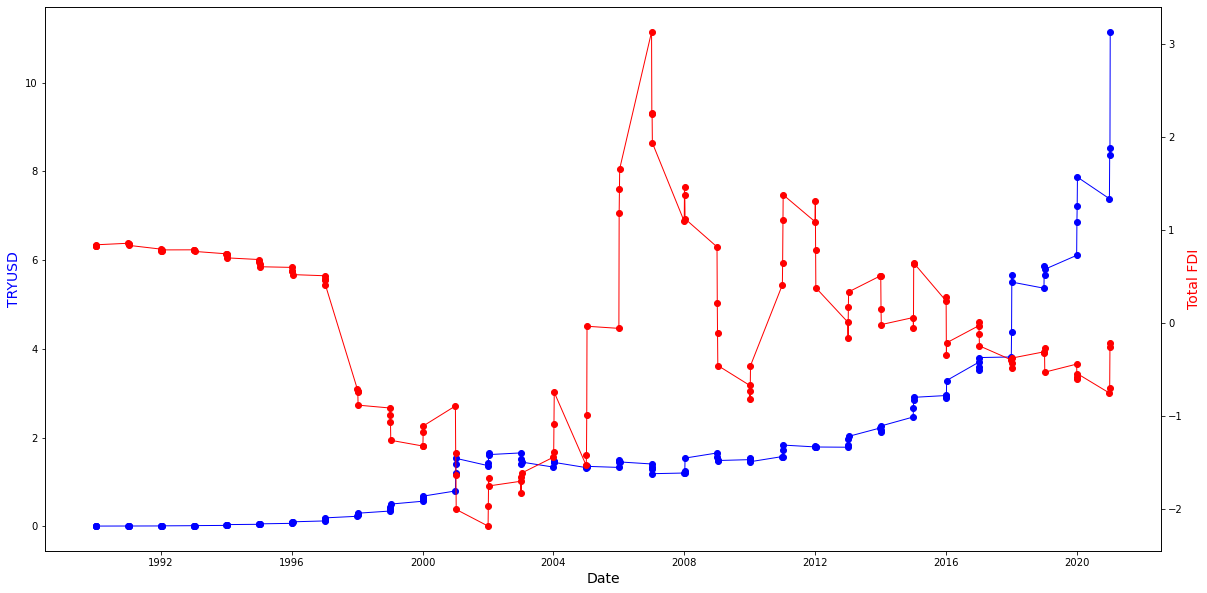

In [985]:
fig,ax = plt.subplots()
ax.plot(df.Date, y, color="blue", marker="o", linewidth=1)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("TRYUSD",color="blue",fontsize=14)
ax5=ax.twinx()
ax5.plot(df.Date, X["Sect_FDI"],color="red", marker='o',linewidth=1)
ax5.set_ylabel("Total FDI",color="red",fontsize=14)
plt.show()

The graph above exhibits the relationship between TRYUSD and total Foreign Direct Investment over time. Turkey actively sought FDI after 1980 with liberal economic policies and foreign currency borrowings, culminating in a political and economic crisis in 2001. But the country recovered rather quickly, appreciation of Turkish Lira seems to have helped pull in more FDI; the period between 2000 and 2008 attests to that. The Great Recession of 2008 seems to have had a heavily negative impact on the economy.   Since then, marginal growth was registered until the exchange rate volatility and inflation crisis of 2017.

#### Relationship between TRYUSD and BOP with time

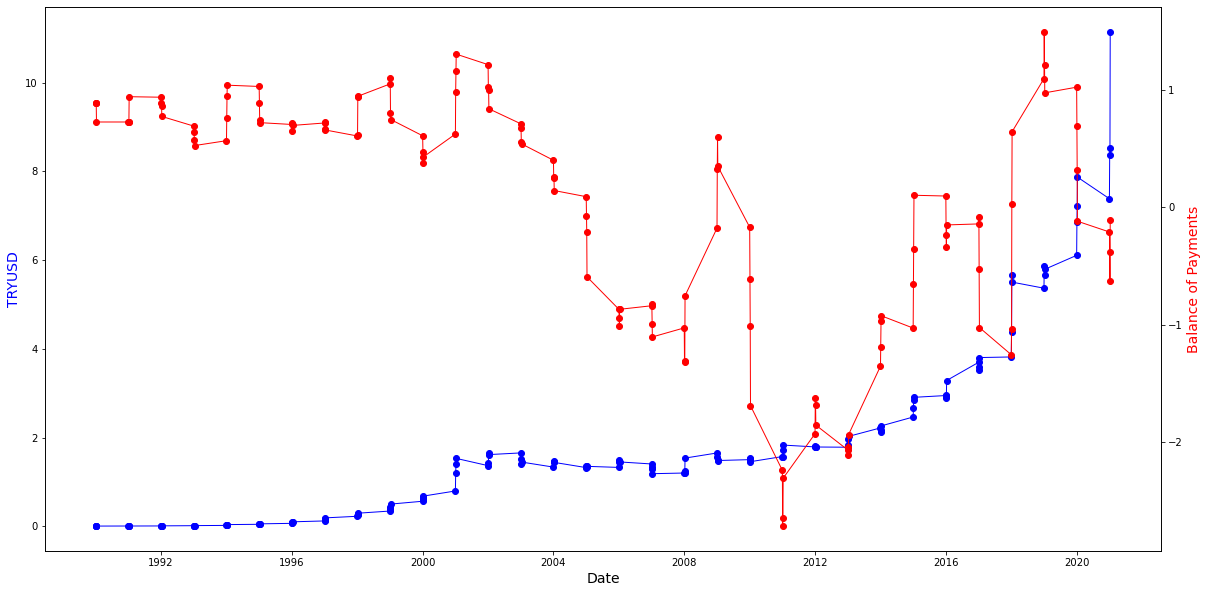

In [986]:
fig,ax = plt.subplots()
ax.plot(df.Date, y, color="blue", marker="o", linewidth=1)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("TRYUSD",color="blue",fontsize=14)
ax5=ax.twinx()
ax5.plot(df.Date, X["BOP"],color="red", marker='o',linewidth=1)
ax5.set_ylabel("Balance of Payments",color="red",fontsize=14)
plt.show()

This graph shows a relation between Exchange rate and Balance of Payments. Balance of Payments is the sum of current account, capital account and financial account.

Balance of Payments is the difference between flow of funds into a country and out to the rest of the world.

What is clear from the above graph is that Turkey has never had a grasp of its account deficits, and that the current crisis isn't an odd event but the culmination of a series of bad fiscal management.

#### Relationship between TRYUSD and GDP with time.

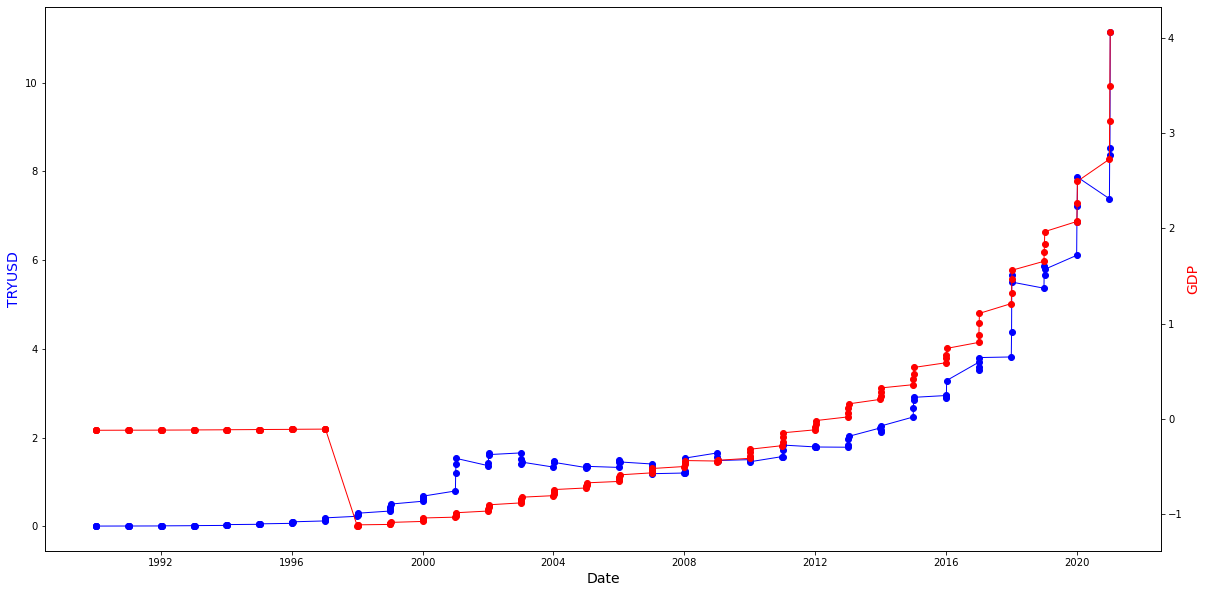

In [987]:
fig,ax = plt.subplots()
ax.plot(df.Date, y, color="blue", marker="o", linewidth=1)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("TRYUSD",color="blue",fontsize=14)
ax5=ax.twinx()
ax5.plot(df.Date, X["GDP"],color="red", marker='o',linewidth=1)
ax5.set_ylabel("GDP",color="red",fontsize=14)
plt.show()

This graph shows a relation between Exchange rate and Gross Domestic Product against Time. 

The positive relationship between these two variables owes to the fact that there is a demand for goods produced domestically, outside of Turkey. While the early 90s seem to reflect the better outcomes of a liberal economic policy (higher GDP, relatively lower TRYUSD), the gap has been bridged since the late 90s. 

#### Relationship between TRYUSD and M3 with time

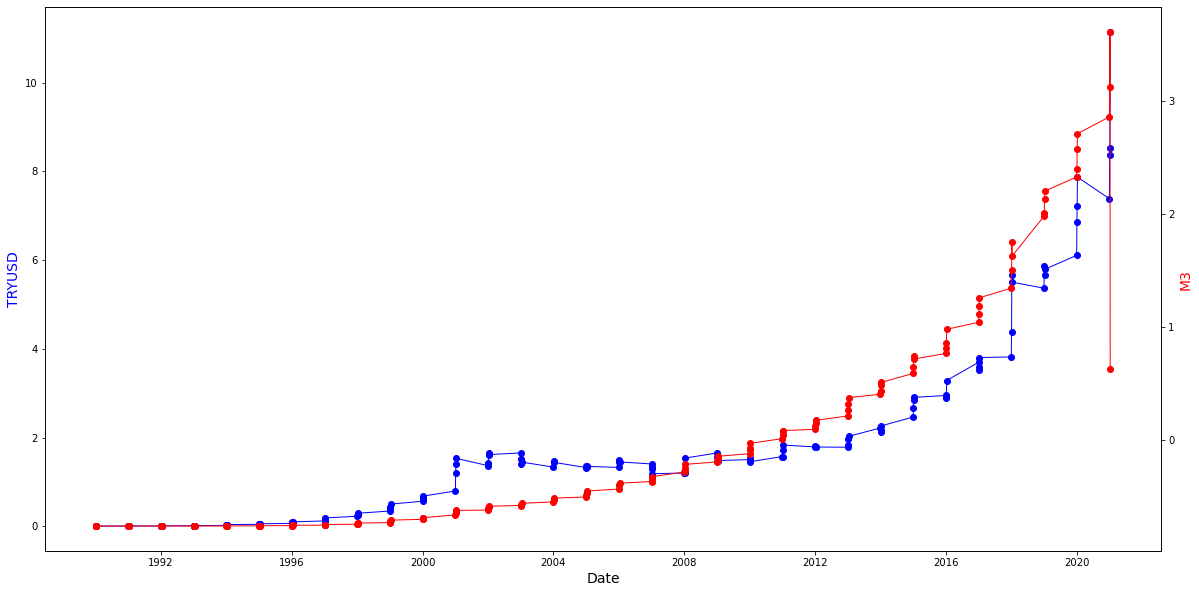

In [988]:
fig,ax = plt.subplots()
ax.plot(df.Date, y, color="blue", marker="o", linewidth=1)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("TRYUSD",color="blue",fontsize=14)
ax5=ax.twinx()
ax5.plot(df.Date, X["M3"],color="red", marker='o',linewidth=1)
ax5.set_ylabel("M3",color="red",fontsize=14)
plt.show()

M3 signifies the total money supply of a country. Falling interest rates lead to depreciation of money in the longterm, which is exactly what's been exhibited in the graph above. Since 2008, this phenomenon seems to have worsened

#### Relationship between TRYUSD and Gross External Debt over time

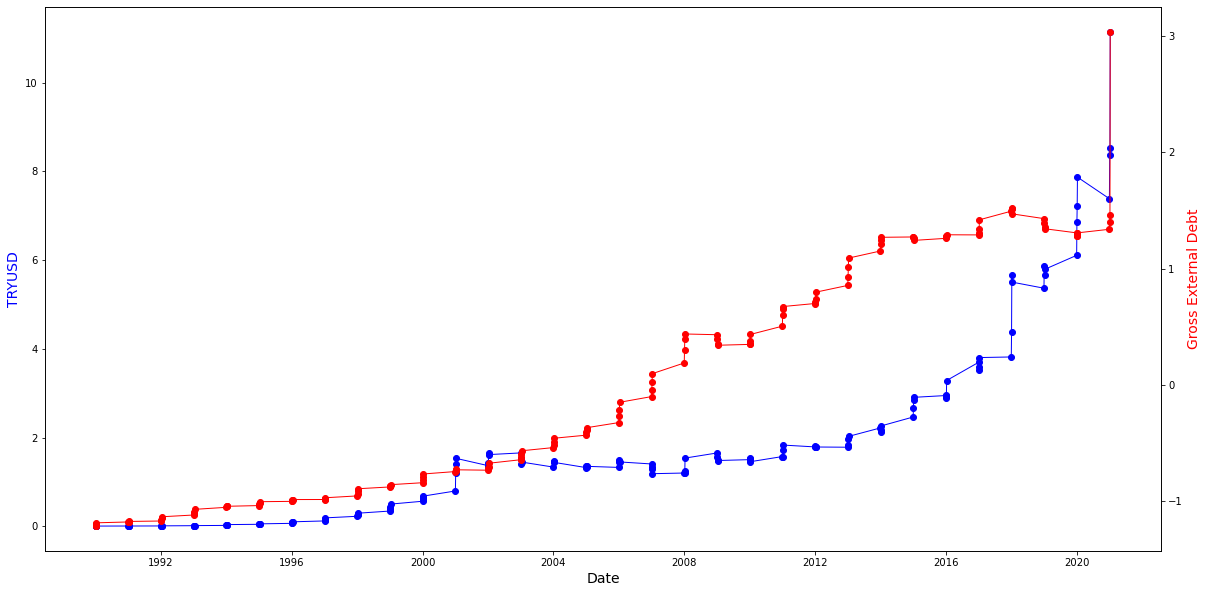

In [989]:
fig,ax = plt.subplots()
ax.plot(df.Date, y, color="blue", marker="o", linewidth=1)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("TRYUSD",color="blue",fontsize=14)
ax5=ax.twinx()
ax5.plot(df.Date, X["Gross External Debt"],color="red", marker='o',linewidth=1)
ax5.set_ylabel("Gross External Debt",color="red",fontsize=14)
plt.show()

Turkey has a history of heavy reliance of external debt. The problems associated with this scenario is that the country is beholden to exchange rate volatility and eventual depreciation of domestic currency because the owings are in foreign currency.

#### Relationship between Jobs and Unemployment over time

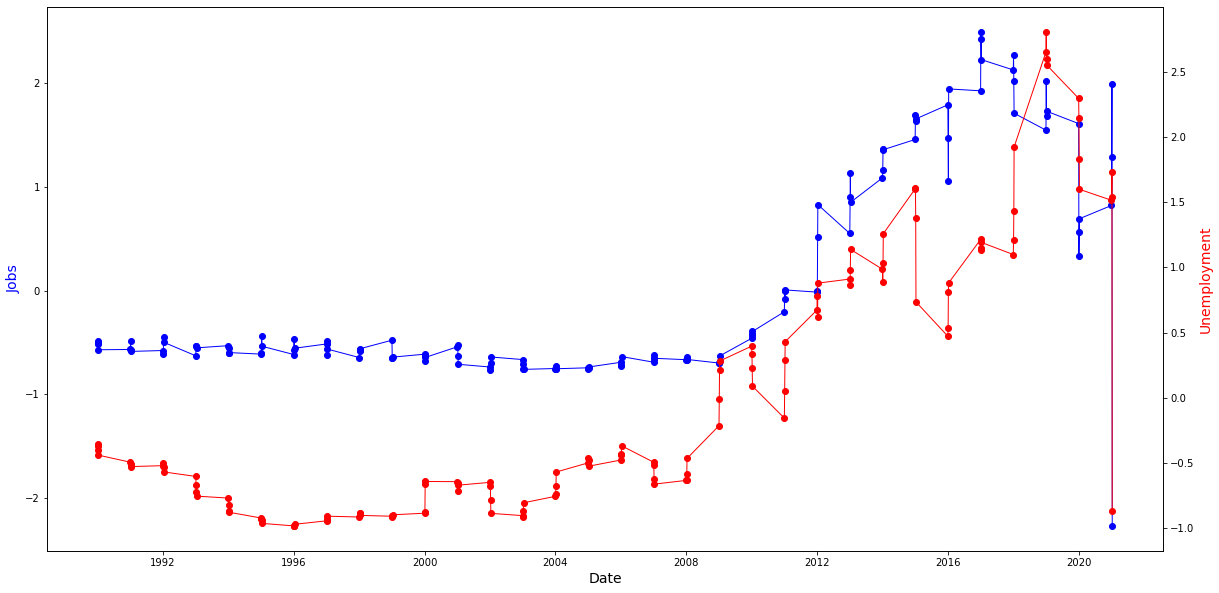

In [990]:
fig,ax = plt.subplots()
ax.plot(df.Date, X.Jobs, color="blue", marker="o", linewidth=1)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Jobs",color="blue",fontsize=14)
ax5=ax.twinx()
ax5.plot(df.Date, X["Unemployment"],color="red", marker='o',linewidth=1)
ax5.set_ylabel("Unemployment",color="red",fontsize=14)
plt.show()

Climbing unemployment levels and falling job vacancies are tied to each other. High unemployment levels guarantee decrease in purchasing power and overall production potential of the country. This in turn affects creation of new jobs because there will be no need to leverage human resources; the demand doesn't match supply.

## Statistical Significance of Variables

In [991]:
#H0: There is no relationship between Interest rate and TRYUSD
#H1: There exists a relationship between Interest rate and TRYUSD
Xi=X['Int']
y=Full_set['TRYUSD']
Xi=sm.add_constant(Xi)
model=sm.OLS(y,Xi).fit()
model.pvalues 

## Pvalue<0.05(significance level). This implies that change in TRYUSD can be predicted by Interest. H0 is rejected

const   0.000000
Int     0.000000
dtype: float64

In [992]:
#H0: There is no relationship between Total FDI and TRYUSD
#H1: There exists a relationship between Total FDI and TRYUSD
Xi=X['Sect_FDI']
y=Full_set['TRYUSD']
Xi=sm.add_constant(Xi)
model=sm.OLS(y,Xi).fit()
model.pvalues 

## Pvalue<0.05(significance level). This implies that change in TRYUSD can be predicted by Total FDI. H0 is rejected

const      0.000000
Sect_FDI   0.022565
dtype: float64

In [993]:
#H0: There is no relationship between BOP and TRYUSD
#H1: There exists a relationship between BOP and TRYUSD
Xi=X['BOP']
y=Full_set['TRYUSD']
Xi=sm.add_constant(Xi)
model=sm.OLS(y,Xi).fit()
model.pvalues 

## Pvalue>0.05(significance level). This implies that the change in TRYUSD cannot be predicted by BOP
##We fail to reject H0

const   0.000000
BOP     0.064739
dtype: float64

In [994]:
#H0: There is no relationship between Financial Account balance and TRYUSD
#H1: There exists a relationship between Financial Account balance and TRYUSD
Xi=X['Fin_Acc']
y=Full_set['TRYUSD']
Xi=sm.add_constant(Xi)
model=sm.OLS(y,Xi).fit()
model.pvalues 

## Pvalue>0.05(significance level). This implies that change in TRYUSD cannot be predicted by Financial Account balance. 
##We fail to reject H0

const     0.000000
Fin_Acc   0.496587
dtype: float64

In [995]:
#H0: There is no relationship between Money supply(M3) and TRYUSD
#H1: There exists a relationship between Money supply(M3) and TRYUSD
Xi=X['M3']
y=Full_set['TRYUSD']
Xi=sm.add_constant(Xi)
model=sm.OLS(y,Xi).fit()
model.pvalues 

## Pvalue<0.05(significance level). This implies that change in TRYUSD can be predicted by Money supply. 
##H0 is rejected

const   0.000000
M3      0.000000
dtype: float64

## Treatment of Multicollinearity

In [910]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1079]:
X=X.drop(['Sect_FDI','BOP','Industry','GDP','Gen_Ind','Services','Prof','CPI','Inf_Com','Real_estate','M3','Manufacturing','Pub_Ser','DPPI','Import','Food','Heat','Gov_Cons','CPI_Energy','Others','Rent','Agri','Fin_Ins','Household','Gross External Debt','Ind_Prod','Misc','Fin_Acc','Export','Pvt_Cons','Elec_Prod','Jobs','Int','Service_FDI'], axis=1)
y=Full_set['TRYUSD']

In [1080]:
vif_scores=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [1081]:
vif=pd.DataFrame()
vif["Feature"]=list(X.columns)
vif['VIF_Score']=vif_scores
vif.sort_values(by='VIF_Score',ascending=False)

,Feature,VIF_Score
5,Construction,3.113395
0,Cur_Acc,2.787282
6,Unemployment,2.786887
4,Ind_FDI,2.770780
3,Agri_FDI,2.594387
7,Cons_Per,2.472403
1,Cap_Acc,1.886191
2,Reserve_Assets,1.276474


## Train - Test Split

In [1082]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(89, 8)
(89,)
(39, 8)
(39,)


## Regression Analysis

### Multivariate Linear Regression - Ordinary Least Squares Method

In [1083]:
X_train_cns= sm.add_constant(X_train)
OLS_model = sm.OLS(y_train,X_train_cns).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TRYUSD   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     221.1
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           3.05e-51
Time:                        11:07:16   Log-Likelihood:                -54.290
No. Observations:                  89   AIC:                             126.6
Df Residuals:                      80   BIC:                             149.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.8496      0.050     36.844      0.000       1.750       1.949
Cur_Acc           -0.5955      0.088     -6.786      0.000      -0.770      -0.421
Cap_Acc            0.1730      0.067      2.574      0.012       0.039       0.307
Reserve_Assets    -0.2244      0.058     -3.854      0.000      -0.340      -0.108
Agri_FDI           0.1691      0.081      2.087      0.040       0.008       0.330
Ind_FDI           -0.4277      0.088     -4.849      0.000      -0.603      -0.252
Construction       0.3061      0.093      3.280      0.002       0.120       0.492
Unemployment       0.7152      0.080      8.977      0.000       0.557       0.874
Cons_Per          -1.2504      0.076    -16.444      0.000      -1.402      -1.099
==============================================================================
Omnibus:                        5.314   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                3.573
Skew:                           0.330   Prob(JB):                        0.168
Kurtosis:                       2.274   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##   Model Evaluation

In [1084]:
X_test_cns = sm.add_constant(X_test)
y_test_pred  = OLS_model.predict(X_test_cns)

In [1085]:
y_actual = np.array(y_test)
y_pred = y_test_pred.values

In [1098]:
Residuals=y_test-y_pred

In [1086]:
print('MSE:',mean_squared_error(y_actual,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_actual,y_pred)))
print('MAE:',mean_absolute_error(y_actual,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_actual,y_pred))

MSE: 0.15510835261779357
RMSE: 0.3938379776225162
MAE: 0.32923819516718045
MAPE: 9.771888662864091


#### Plotting of Residuals

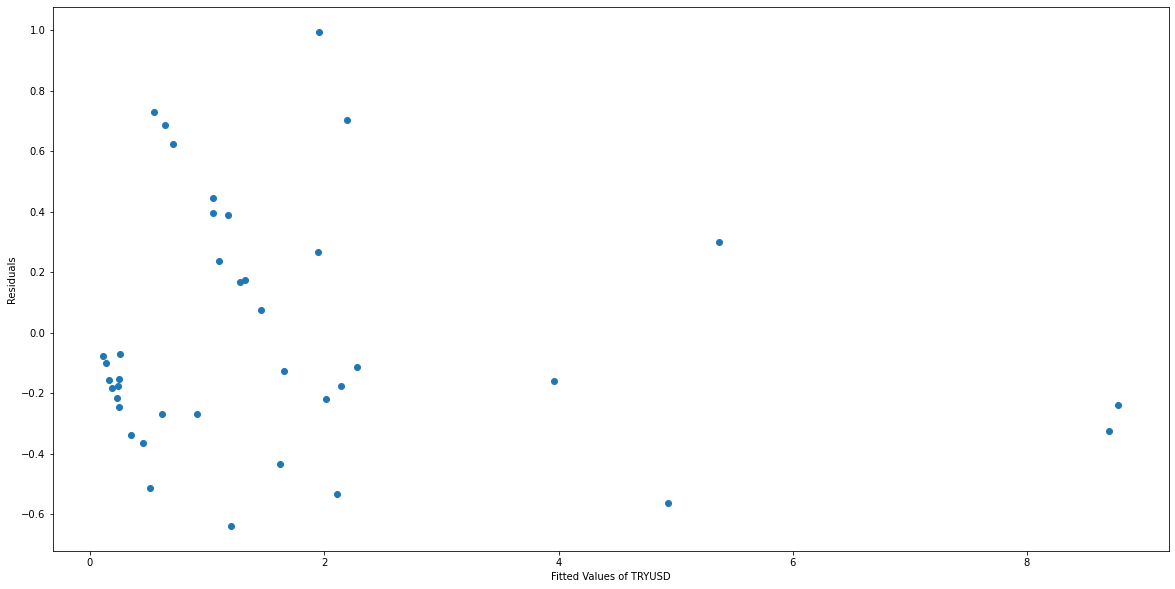

In [1104]:
plt.xlabel("Fitted Values of TRYUSD")
plt.ylabel("Residuals")
plt.scatter(y=Residuals,x=y_pred);

The residuals are scattered in a random fashion, there is no distinctive pattern to their placement.
There is a linear relationship.